# 1-  Composite-Trapezoidal Rule

### Explanation

The Trapezoidal Rule is a numerical method for approximating the definite integral of a function \( f(x) \) over an interval \([a, b]\). The interval is divided into \( n \) subintervals, each of width \( h \). The area under the curve is approximated by summing up the areas of trapezoids formed by the function values at the endpoints and the midpoints of these subintervals.

### Trapezoidal Rule Formula

The formula for the Trapezoidal Rule is:

$$
I \approx h \left( \frac{f(a)}{2} + \sum_{i=1}^{n-1} f(x_i) + \frac{f(b)}{2} \right)
$$

where:
- $( h = \frac{b - a}{n} )$ is the width of each subinterval.
- $( x_i = a + i \cdot h )$ are the points in the interval \([a, b]\).

### Error Estimation using the Midpoint Rule

To estimate the error, we use the Midpoint Rule, which is given by:

$$
M \approx h \sum_{i=1}^{n} f \left( \frac{x_{i-1} + x_i}{2} \right)
$$

The error estimate ( E ) is then:

$$
E \approx \left| T - M \right|
$$

where ( T ) is the result from the Trapezoidal Rule and ( M ) is the result from the Midpoint Rule.

### Algorithm

1. Initialize ( n = 1 ).
2. Compute the initial trapezoidal approximation ( T ) and midpoint approximation (M).
3. Estimate the error $( E = | T - M | )$.
4. While $( E )$ is greater than the specified tolerance $(TOL)$:
   - Double the number of subintervals ( n ).
   - Recompute ( T ) and ( M ).
   - Re-estimate the error ( E).
5. Return the integral approximation ( T ), the number of subintervals  n , and the estimated error (E).


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def summed_trapezoidal_rule(f, a, b, tol, maxL):
    h = b - a
    L = 1
    T = h * (f(a) + f(b)) / 2  # trapezoidal initialize
    
    for k in range(maxL):

        midpoints =(a + (np.arange(L) + 0.5) * h)
        M = h * np.sum(f(midpoints))
        
        # Update trapezoidal using midpoint
        T = (T + M) / 2
        error = np.abs(T - M)
        
        if error < tol:
            break 
        
        # Next iteration
        h /= 2
        L *= 2
    
    else:
        raise Exception("The stopping criteria were not met within the max number of iterations.")
        
    
    return T

In [2]:
f = lambda x: np.sqrt(x)
a, b = 0, 0.5
tol = 1e-6
maxL = 100 
result = summed_trapezoidal_rule(f, a, b, tol, maxL)

try:
    result = summed_trapezoidal_rule(f, a, b, tol, maxL)
    print(f"Approximate integral: {result}")
    print ("error:", error)
except Exception as e:
    print(e)

Approximate integral: 0.23570198089759978
name 'error' is not defined


# 2 - Adaptive Trapezoidal Rule

Initialization: eval_count is initialized to [2] because the function f is evaluated at the endpoints a and b initially. This accounts for the first two evaluations.

Update within Recursion: As the recursive function TrapezRek is called, the function f is evaluated at new points (such as the midpoint), and the count is incremented by modifying eval_count[0].

Returning the Count: When returning the result, you want to return the actual count of function evaluations, which is stored in eval_count[0]. The 0 index is used to access this count because eval_count is a list with the count as its first (and only) element.

In [3]:
from NumInteg import *  #Importing all the functions

Tolerance: 0.1, Error (adaptive): 0.010110028629970097, Function evaluations: 3


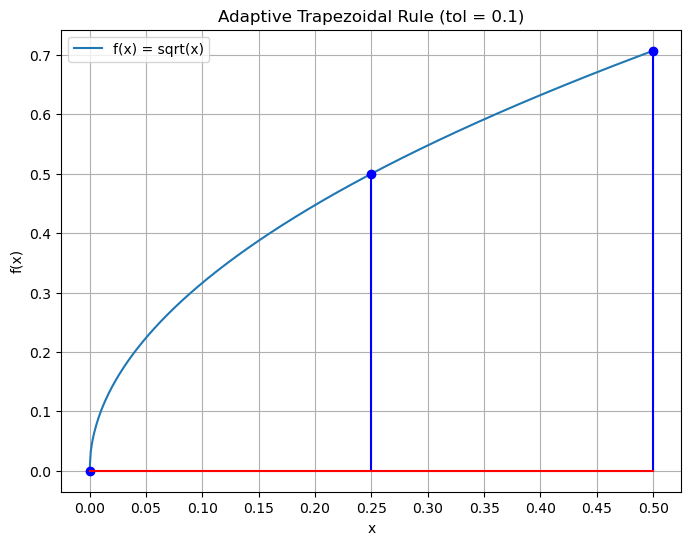

Tolerance: 0.01, Error (adaptive): 0.0035851734645648836, Function evaluations: 5


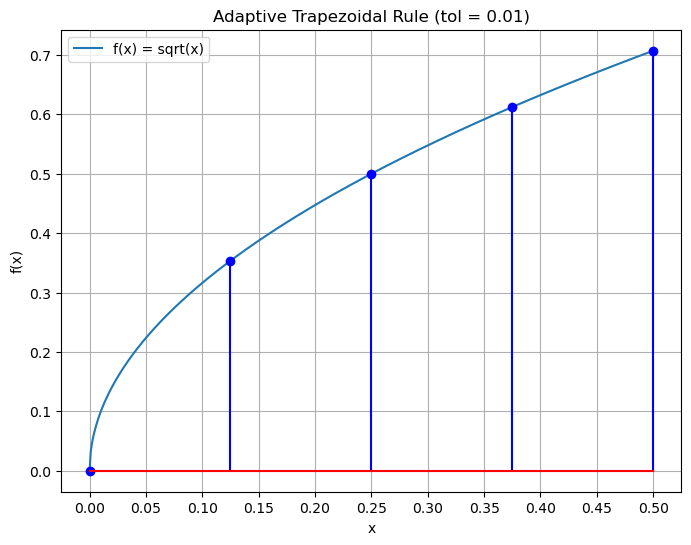

Tolerance: 0.001, Error (adaptive): 0.0004626819020301931, Function evaluations: 9


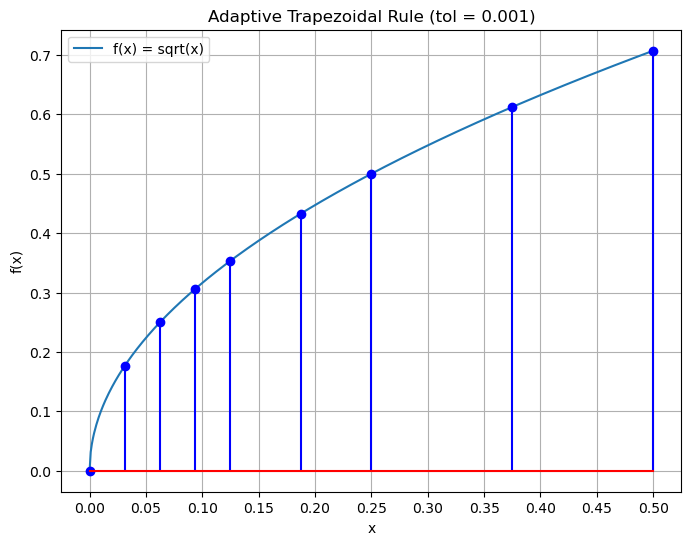

Tolerance: 0.0001, Error (adaptive): 5.889433243516651e-05, Function evaluations: 17


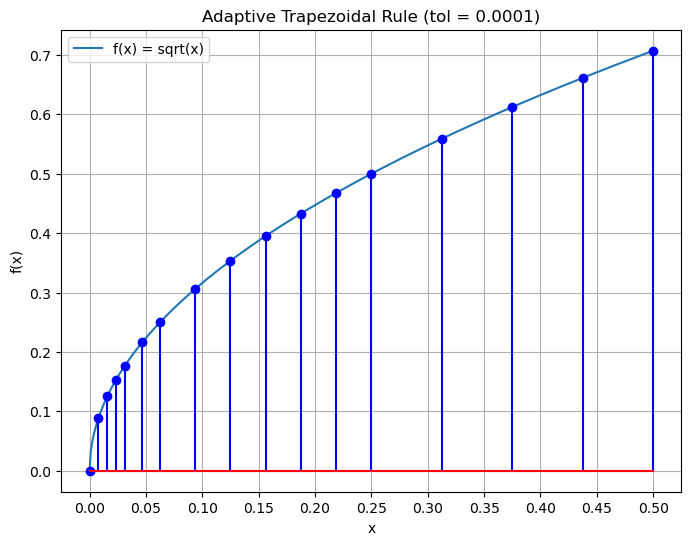

Tolerance: 1e-05, Error (adaptive): 7.431348909237023e-06, Function evaluations: 33


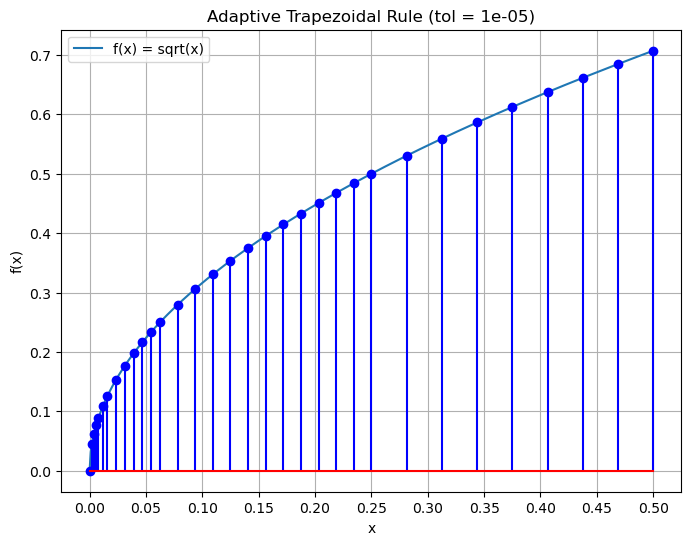

Tolerance: 1e-06, Error (adaptive): 3.6606902187319434e-07, Function evaluations: 71


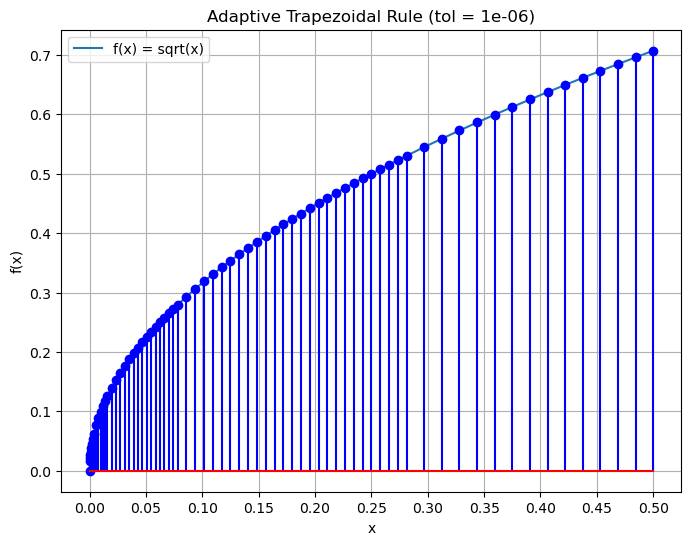

In [4]:
def f(x):
    return np.sqrt(x)


# Define the interval
a = 0
b = 0.5

# Perform the adaptive method for various tolerances
tolerances = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]

for tol in tolerances:
    integral_adapt, eval_count, nodes = TrapezAdaptivVorlage(f, a, b, tol)
    
    # Sort the nodes and convert them to an ndarray
    nodes = np.array(sorted(nodes))
    
    # Calculate errors
    exact_value = 0.23570226039551573
    error_adapt = np.abs(exact_value - integral_adapt)

    print(f"Tolerance: {tol}, Error (adaptive): {error_adapt}, Function evaluations: {len(nodes)}")
    
    # Define x range for the plot
    x = np.linspace(a, b, 500)
    y = f(x)
    points = nodes
    x_points, y_points = zip(*points)

    
    # Plot for the adaptive quadrature method using plt.stem
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label=f"f(x) = sqrt(x)")
    plt.stem(x_points, y_points, linefmt='b-', markerfmt='bo', basefmt='r-')

    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f"Adaptive Trapezoidal Rule (tol = {tol})")
    plt.legend()
    plt.grid(True)
    plt.xticks(np.arange(a, b + 0.05, 0.05))
    plt.show()


# Tests for the stopping criteria

In [5]:
def f1(x):
    return (x * x) + 4*x  # Normal case

def f2(x):
    return np.sin(10/x)  # Difficult case high oscilations, likely to exceed max evaluations

def f3(x):
    return np.log(x)  # Non-finite values at x = 0

def f4(x):
    return 1 / (x - 1)  #Causes minimum interval length to be an issue


# Test execution
def run_tests():
    test_cases = [
        ("Normal Case", f1, 0, 4, 1e-6, 1e-5),
        ("Max Evaluations", f2, 0.1, 1, 1e-6, 1e-5),
        ("Non-finite Values", f3, 0, 2, 1e-3, 1e-5),
        ("Min Interval Length", f4, 0, 1.5, 1e-3, 1e-4),]

    for name, func, a, b, tol, hmin in test_cases:
        try:
            print(f"Running test: {name}")
            result, eval_count = TrapezAdaptivVorlage(func, a, b, tol, max_evals=1000, hmin=hmin)
            print(f"Result: {result}, Function evaluations: {len(eval_count)}\n")
        except Exception as e:
            print(f"Test {name} failed: {e} \n")

if __name__ == "__main__":
    run_tests()


Running test: Normal Case
Test Normal Case failed: too many values to unpack (expected 2) 

Running test: Max Evaluations
Test Max Evaluations failed: Exceeded maximum number of function evaluations. 

Running test: Non-finite Values
Test Non-finite Values failed: Function evaluation resulted in a non-finite value. 

Running test: Min Interval Length
Test Min Interval Length failed: Interval length below minimum threshold. 



/var/folders/n3/vcfb4r8s0f599l38g9bcgq7c0000gn/T/ipykernel_35146/1941210299.py:8: RuntimeWarning: divide by zero encountered in log
  return np.log(x)  # Non-finite values at x = 0


# 3- Adaptive Simpson's Method 

Tolerance: 0.1, Error (adaptive): 0.0031501831202045416, Function evaluations: 5


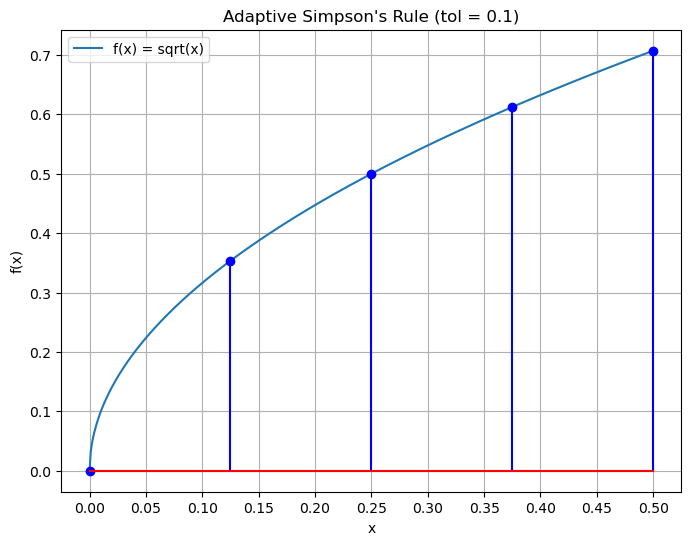

Tolerance: 0.01, Error (adaptive): 0.0031501831202045416, Function evaluations: 5


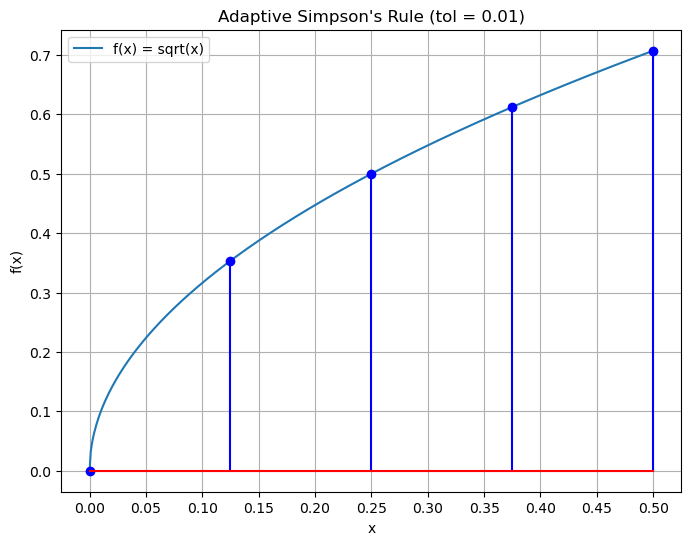

Tolerance: 0.001, Error (adaptive): 0.0031501831202045416, Function evaluations: 5


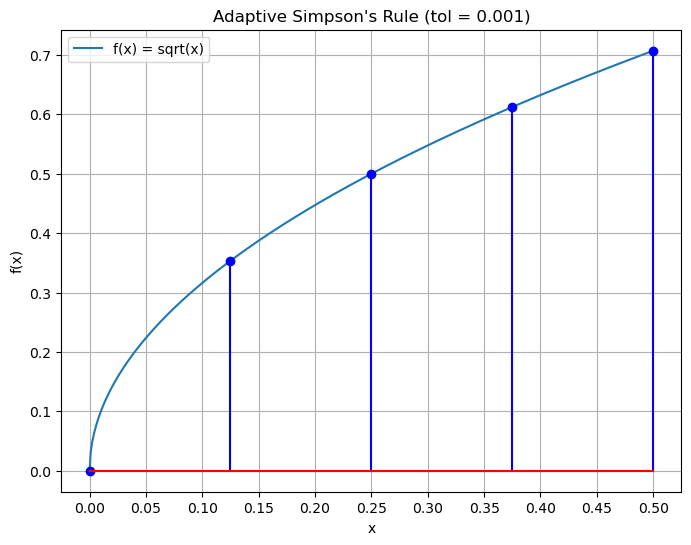

Tolerance: 0.0001, Error (adaptive): 0.00039393357642175664, Function evaluations: 13


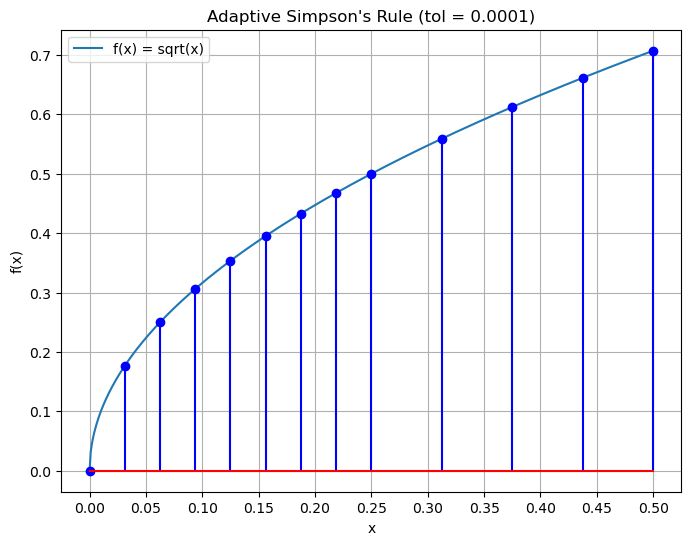

Tolerance: 1e-05, Error (adaptive): 4.9402383448915455e-05, Function evaluations: 21


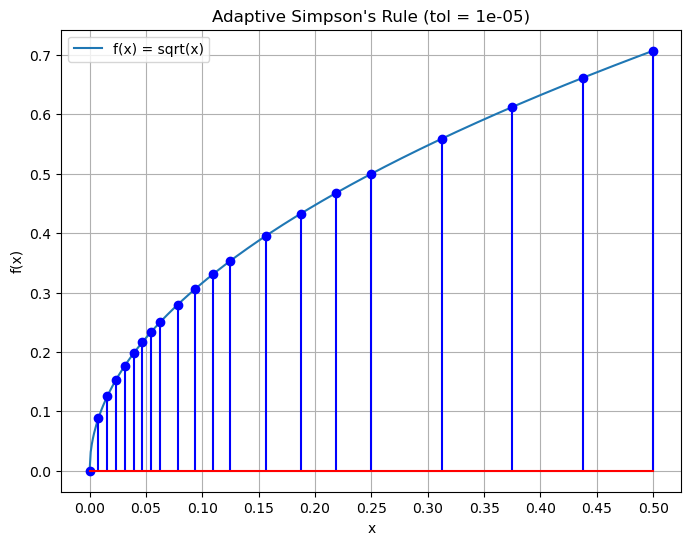

In [6]:
def f(x):
    return np.sqrt(x)

# Define the interval
a = 0
b = 0.5

# Perform the adaptive method for various tolerances
tolerances = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]

for tol in tolerances:
    integral_adapt, eval_count, nodes = AdaptiveSimpsonsRule(f, a, b, tol)
    
    # Sort the nodes and convert them to an ndarray
    nodes = np.array(sorted(nodes))
    
    # Calculate errors
    exact_value = 0.23570226039551573
    error_adapt = np.abs(exact_value - integral_adapt)

    print(f"Tolerance: {tol}, Error (adaptive): {error_adapt}, Function evaluations: {eval_count}")
    
    # Define x range for the plot
    x = np.linspace(a, b, 500)
    y = f(x)
    points = nodes
    x_points, y_points = zip(*points)

    
    # Plot for the adaptive quadrature method using plt.stem
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label=f"f(x) = sqrt(x)")
    plt.stem(x_points, y_points, linefmt='b-', markerfmt='bo', basefmt='r-')

    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f"Adaptive Simpson's Rule (tol = {tol})")
    plt.legend()
    plt.grid(True)
    plt.xticks(np.arange(a, b + 0.05, 0.05))
    plt.show()


# Tests for the stopping criteria

In [7]:
def f1(x):
    return (x * x) + 4*x  # Normal case

def f2(x):
    return np.sin(100/x)  #high oscillations, likely to exceed max evaluations

def f3(x):
    return np.log(x)  # Non-finite values at x = 0

def f4(x):
    return 1 / (x - 1)  # Causes minimum interval length to be an issue

# Test execution
def run_tests():
    test_cases = [
        ("Normal Case", f1, 0, 4, 1e-6, 1e-5),
        ("Max Evaluations", f2, 0.1, 1, 1e-6, 1e-5),
        ("Non-finite Values", f3, 0, 2, 1e-3, 1e-5),
        ("Min Interval Length", f4, 0, 1.5, 1e-3, 1e-4),
    ]

    for name, func, a, b, tol, hmin in test_cases:
        try:
            print(f"Running test: {name}")
            result, eval_count, points = AdaptiveSimpsonsRule(func, a, b, tol, max_evals=1000, hmin=hmin)
            print(f"Result: {result}, Function evaluations: {eval_count}\n")
        except Exception as e:
            print(f"Test {name} failed: {e} \n")

if __name__ == "__main__":
    run_tests()


Running test: Normal Case
Result: 53.33333333333333, Function evaluations: 5

Running test: Max Evaluations
Test Max Evaluations failed: Exceeded maximum number of function evaluations. 

Running test: Non-finite Values
Test Non-finite Values failed: Function evaluation resulted in a non-finite value. 

Running test: Min Interval Length
Test Min Interval Length failed: Interval length below minimum threshold. 



/var/folders/n3/vcfb4r8s0f599l38g9bcgq7c0000gn/T/ipykernel_35146/1626954294.py:8: RuntimeWarning: divide by zero encountered in log
  return np.log(x)  # Non-finite values at x = 0


# 4- Comparetive test for multiple functions

#### To define the error for these numerical methods first calculate the exact values of the integrals

In [8]:
from scipy.integrate import quad

def f1(x):
    return 2 + np.sin(x**2)

result1, error = quad(f1,0,5)
print('result1:', result1)

def f2(x):
    return 4 + 2 * np.sin(x) + np.cos(3 * x)

result2, error = quad(f2, 0 , 2*np.pi)
print('result2:', result2)

def f3(x):
    return np.exp(np.sin(2 * x))

result3, error = quad(f2, 0, np.pi)
print('result3:', result3)

result1: 10.527917281165323
result2: 25.132741228718345
result3: 16.566370614359172


 Function 1, Tolerance: 0.1
 Error (Trapezoidal): 0.7488077947386564, Function evaluations (Trapezoidal): 3
 Error (Simpson):     0.07080256210874758,Function evaluations (Simpson): 9 


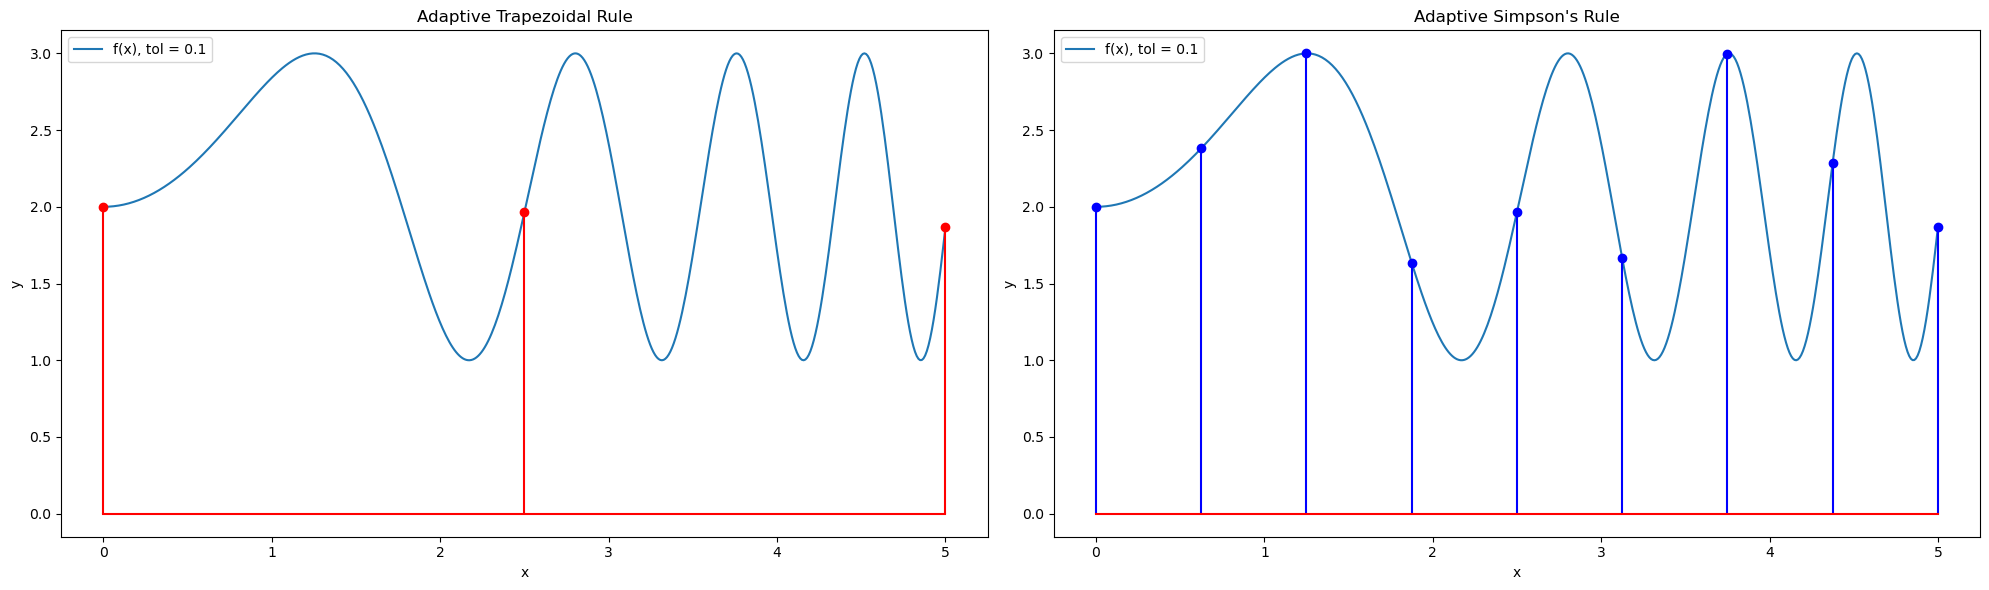

 Function 1, Tolerance: 0.01
 Error (Trapezoidal): 0.01177823206280948, Function evaluations (Trapezoidal): 39
 Error (Simpson):     0.007349388740355067,Function evaluations (Simpson): 25 


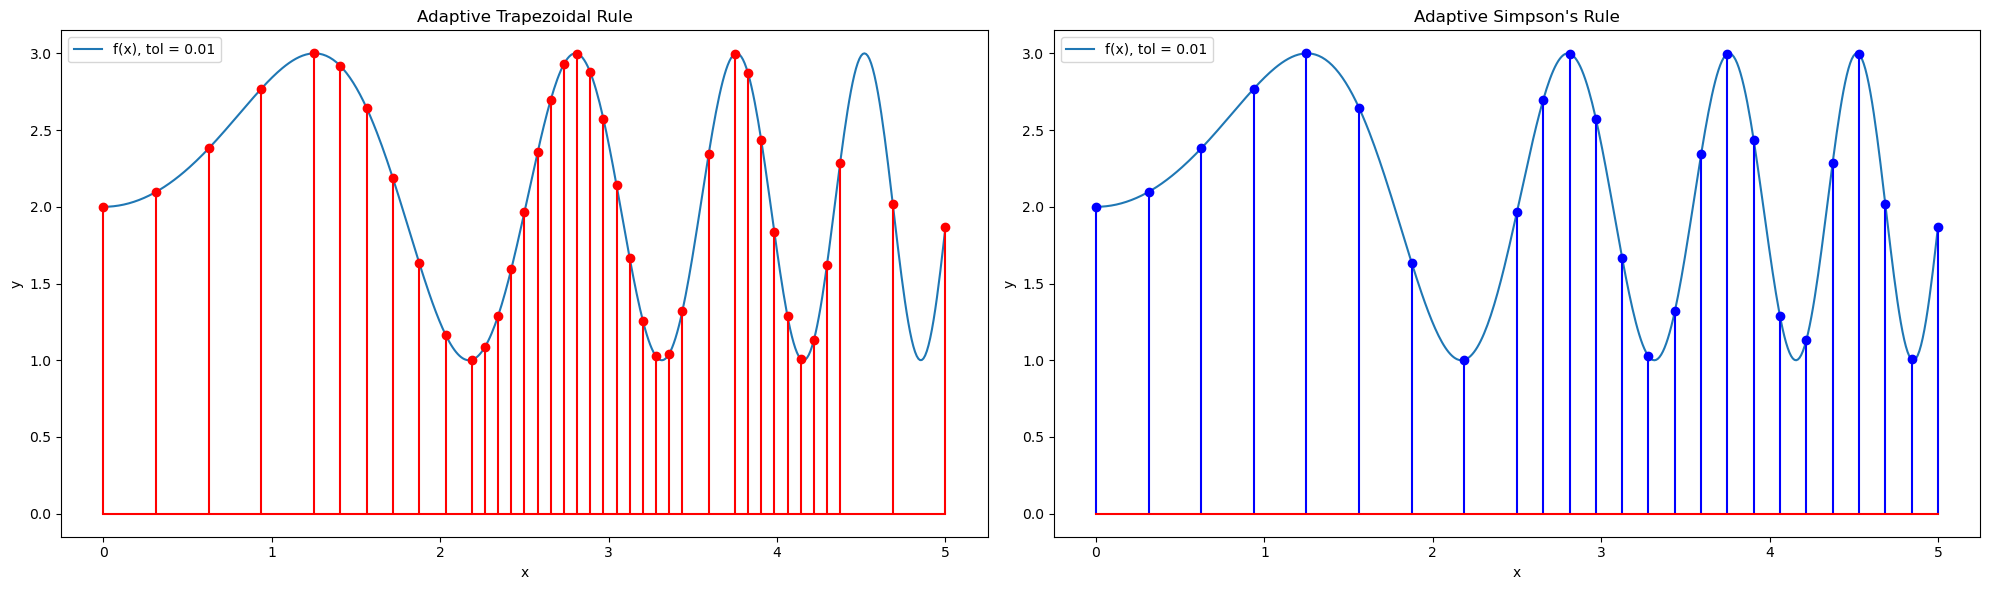

 Function 1, Tolerance: 0.001
 Error (Trapezoidal): 5.4920759312793166e-05, Function evaluations (Trapezoidal): 91
 Error (Simpson):     0.0024872495287091567,Function evaluations (Simpson): 45 


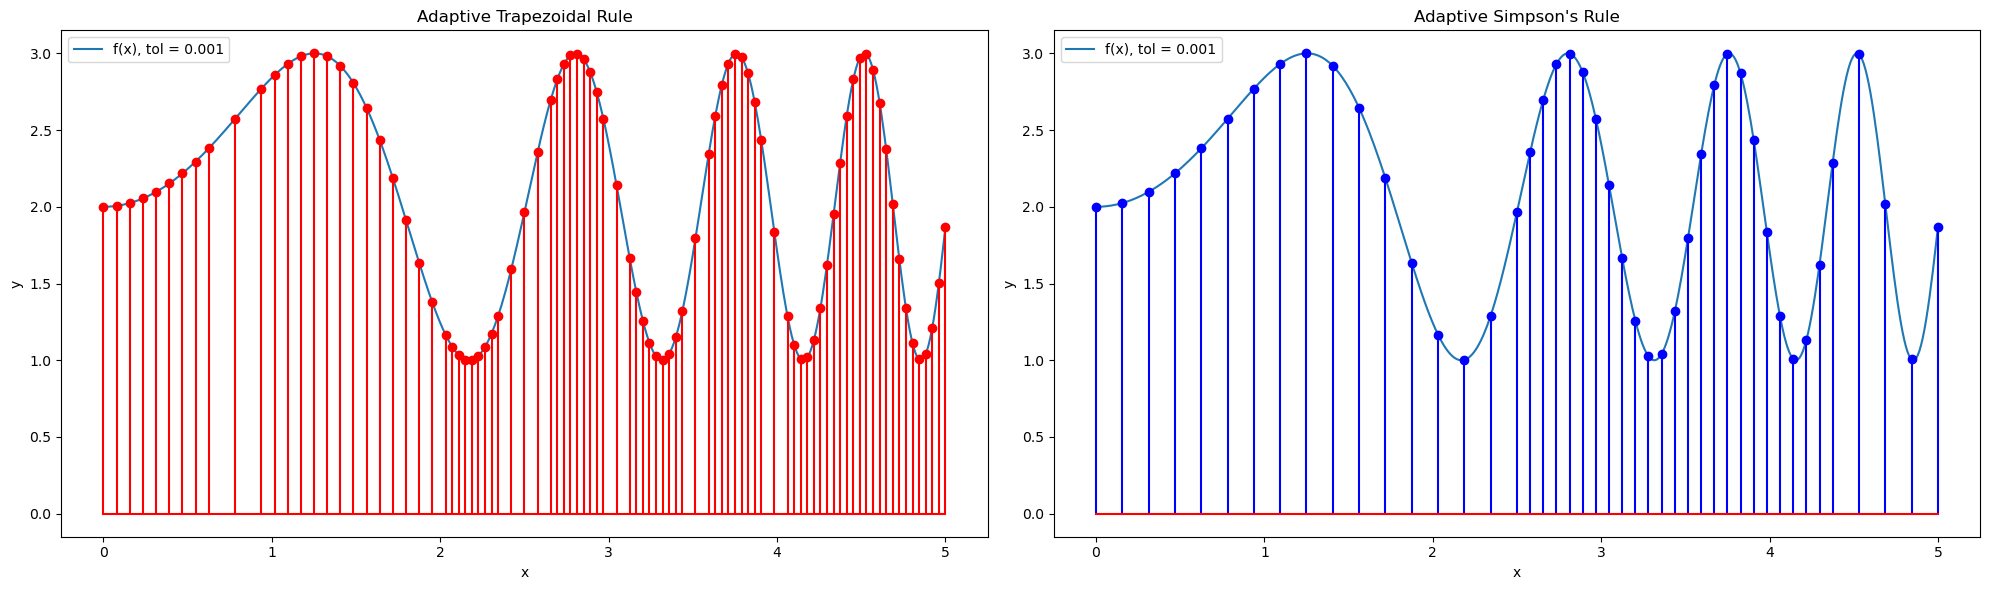

 Function 1, Tolerance: 0.0001
 Error (Trapezoidal): 1.3524237374440418e-06, Function evaluations (Trapezoidal): 199
 Error (Simpson):     8.886068467717223e-06,Function evaluations (Simpson): 77 


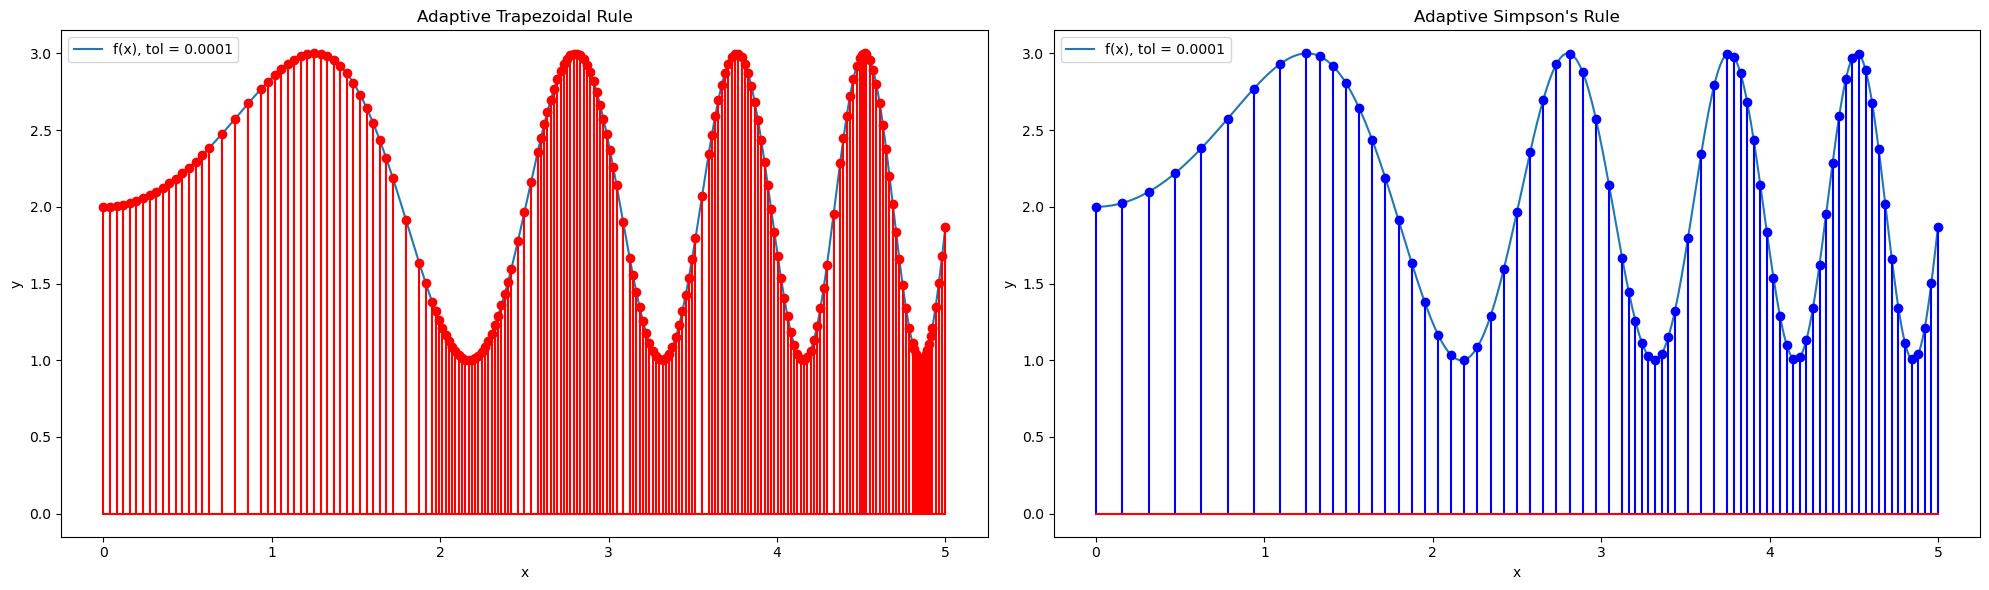

 Function 2, Tolerance: 0.1
 Error (Trapezoidal): 0.0, Function evaluations (Trapezoidal): 17
 Error (Simpson):     7.105427357601002e-15,Function evaluations (Simpson): 9 


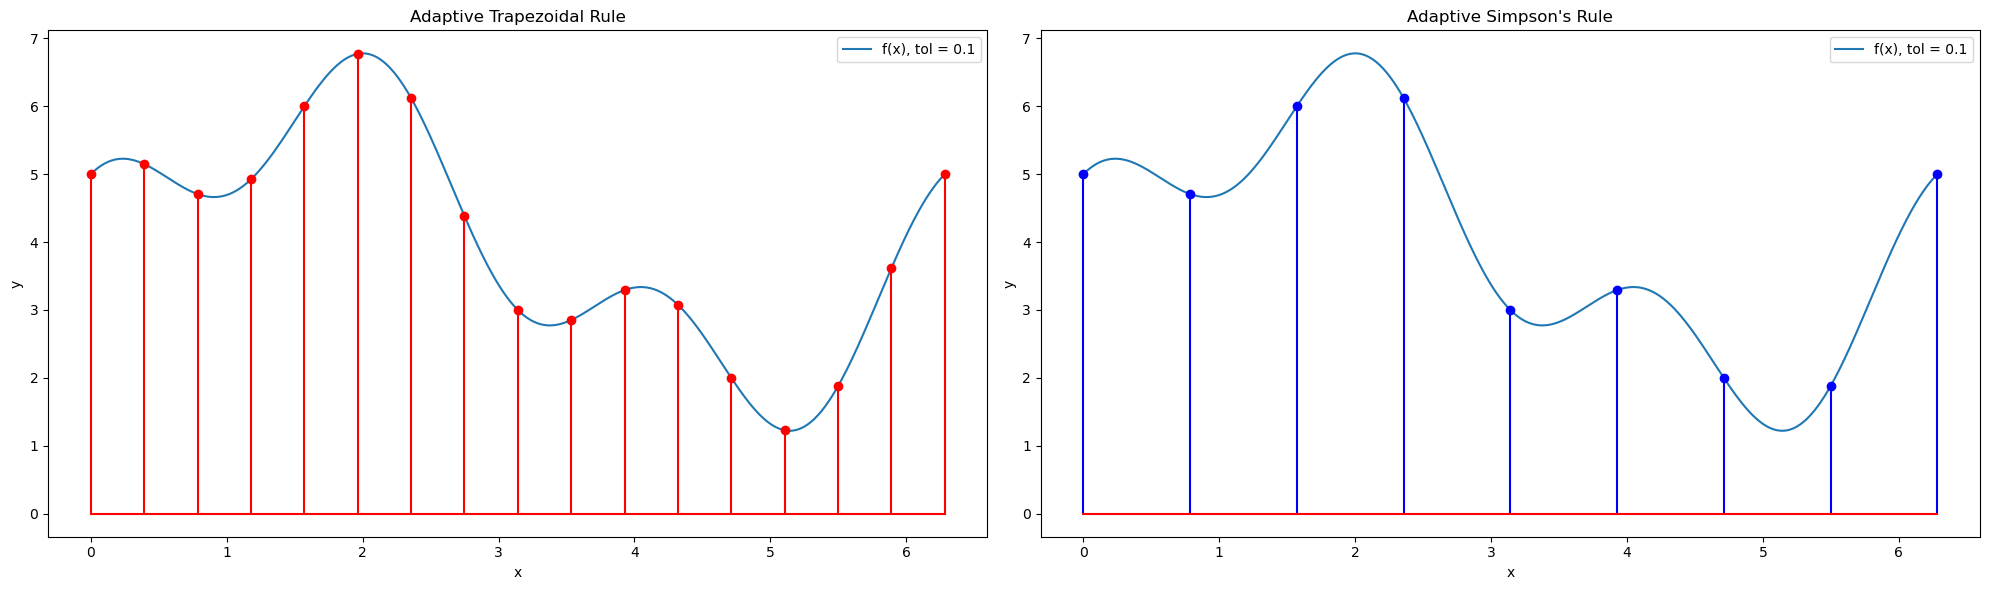

 Function 2, Tolerance: 0.01
 Error (Trapezoidal): 0.0, Function evaluations (Trapezoidal): 37
 Error (Simpson):     3.552713678800501e-15,Function evaluations (Simpson): 17 


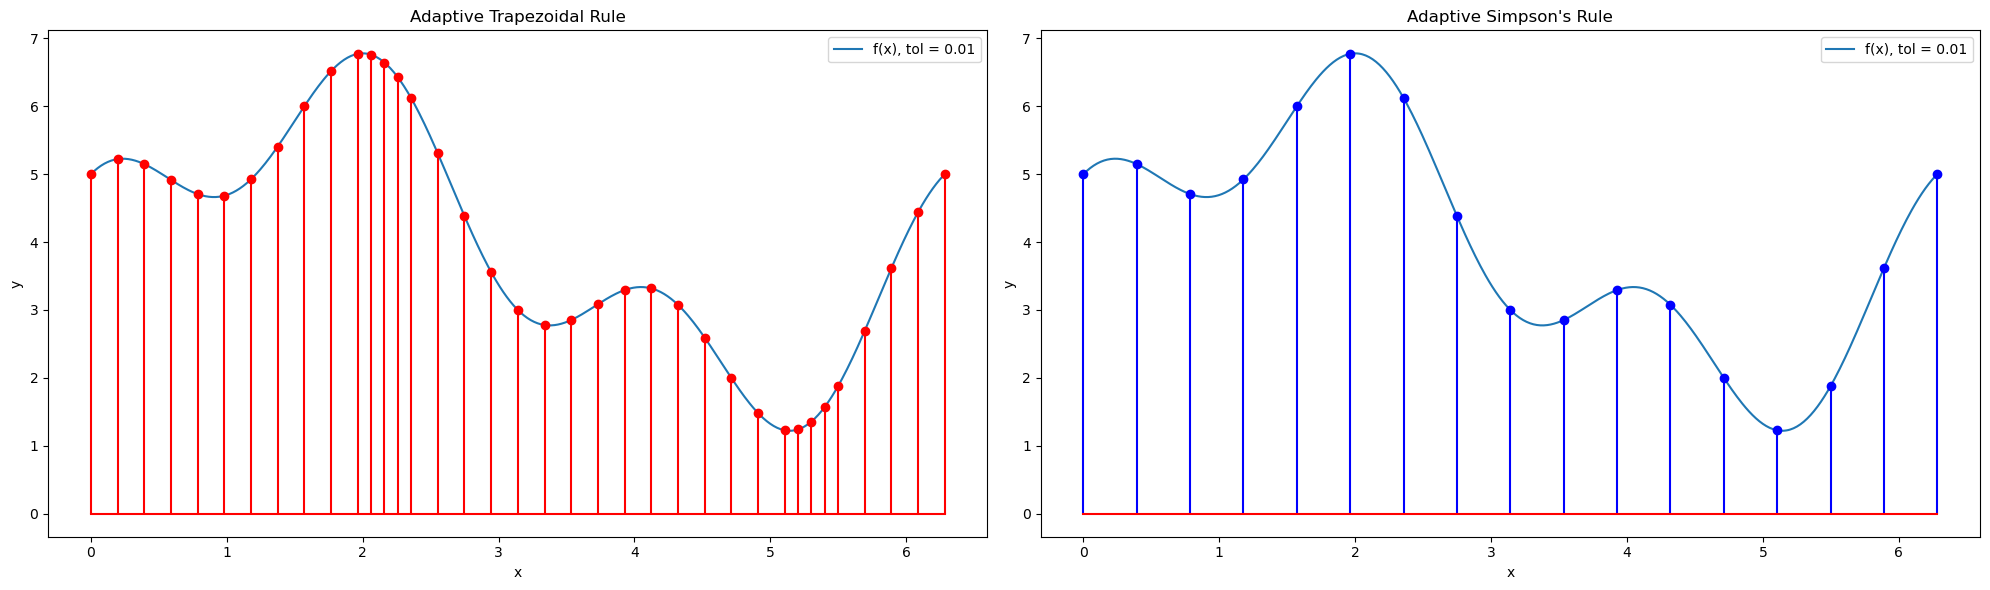

 Function 2, Tolerance: 0.001
 Error (Trapezoidal): 0.0, Function evaluations (Trapezoidal): 85
 Error (Simpson):     3.552713678800501e-15,Function evaluations (Simpson): 33 


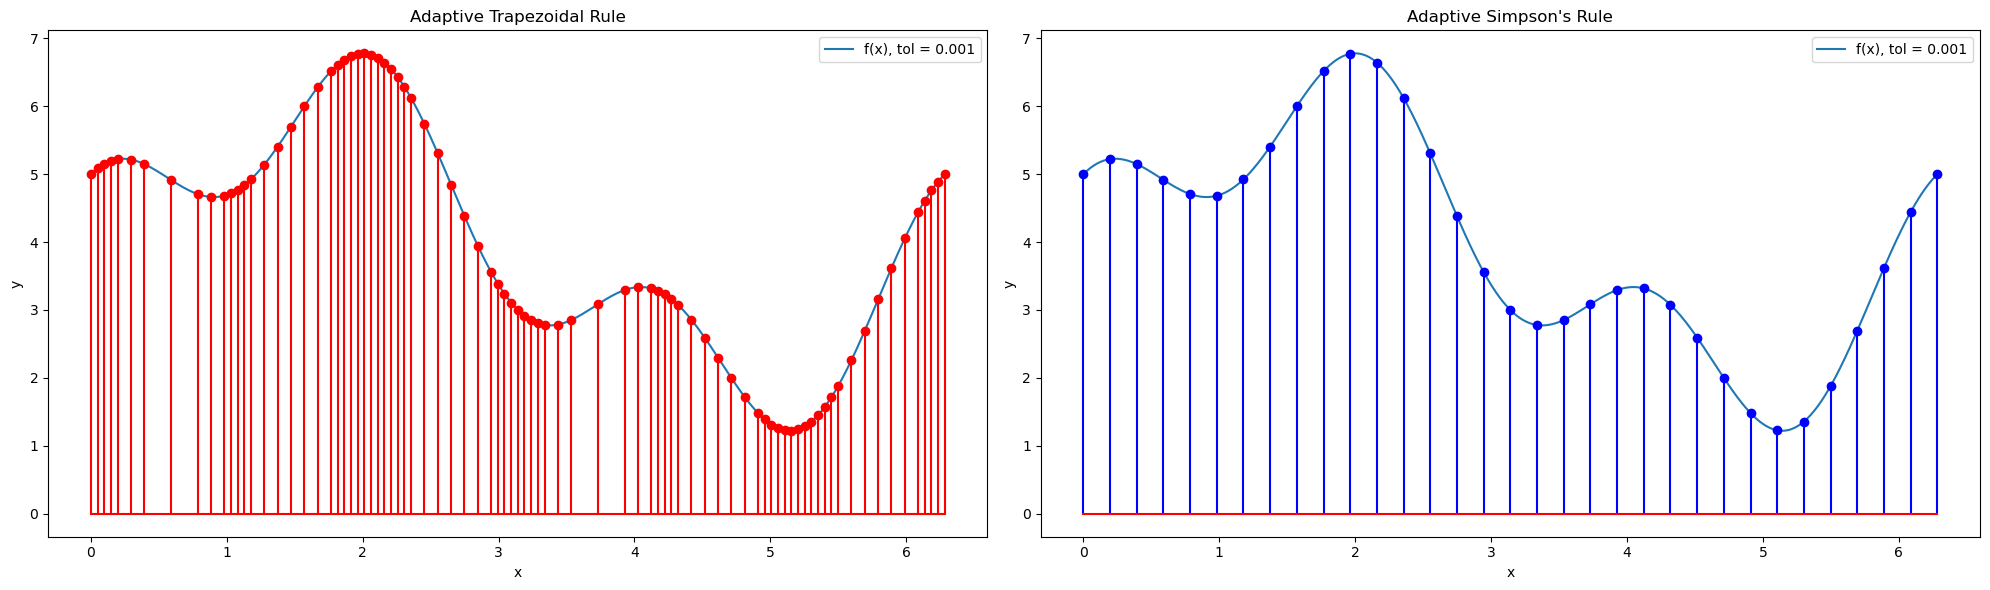

 Function 2, Tolerance: 0.0001
 Error (Trapezoidal): 0.0, Function evaluations (Trapezoidal): 201
 Error (Simpson):     0.0,Function evaluations (Simpson): 65 


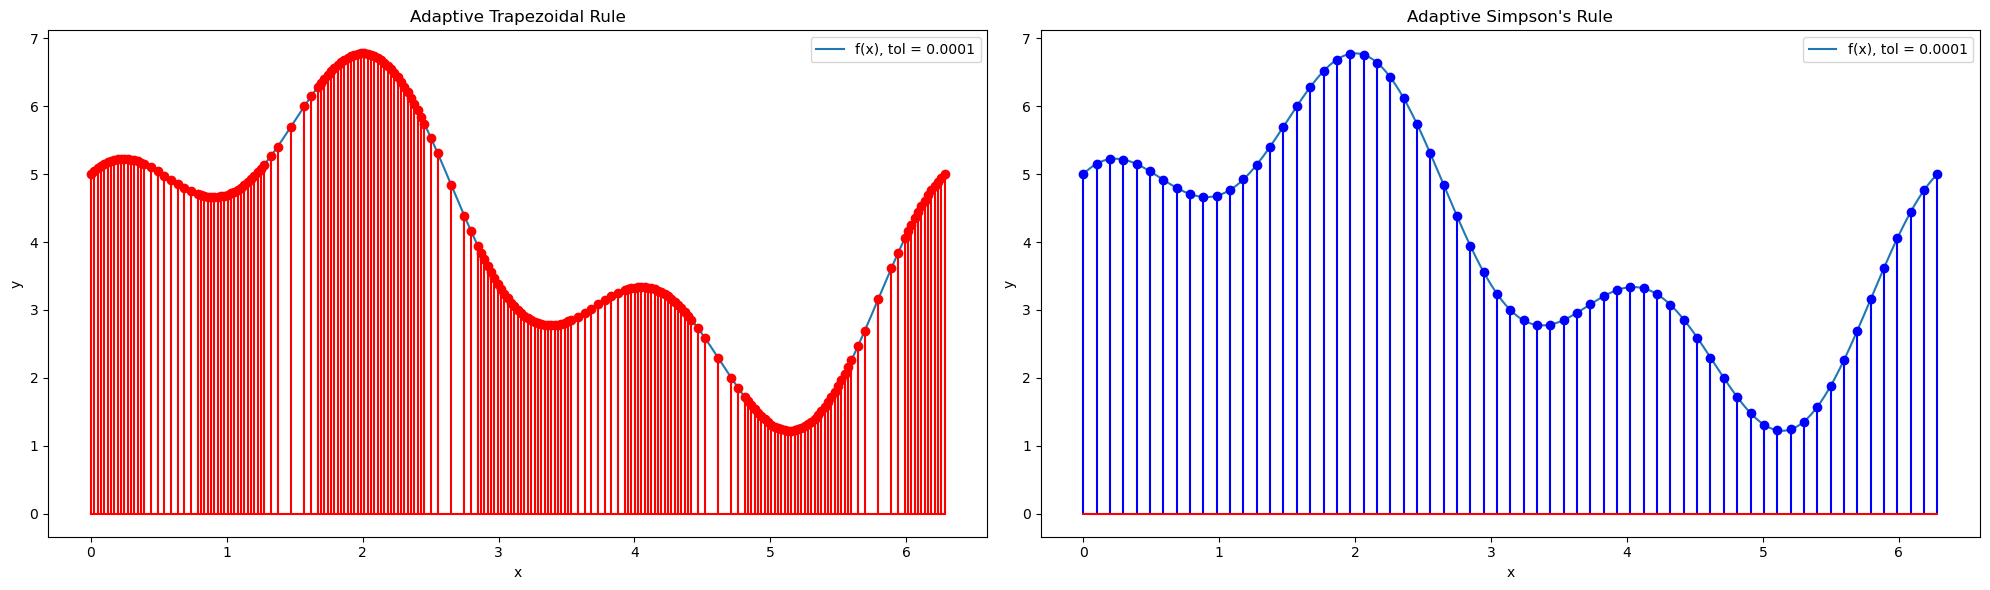

 Function 3, Tolerance: 0.1
 Error (Trapezoidal): 13.42477796076938, Function evaluations (Trapezoidal): 3
 Error (Simpson):     12.21152417755697,Function evaluations (Simpson): 5 


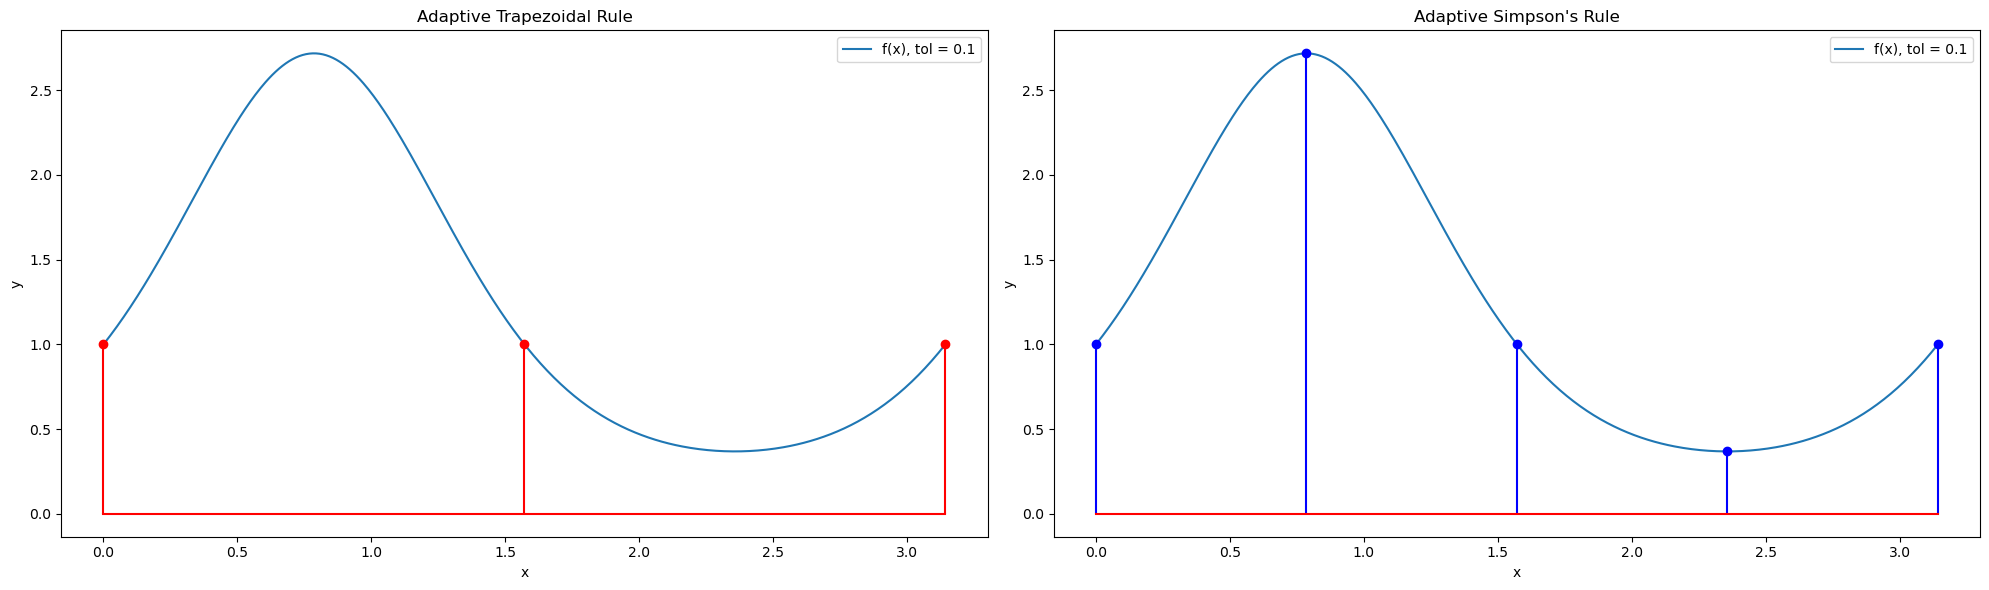

 Function 3, Tolerance: 0.01
 Error (Trapezoidal): 13.42477796076938, Function evaluations (Trapezoidal): 3
 Error (Simpson):     12.58938384206893,Function evaluations (Simpson): 13 


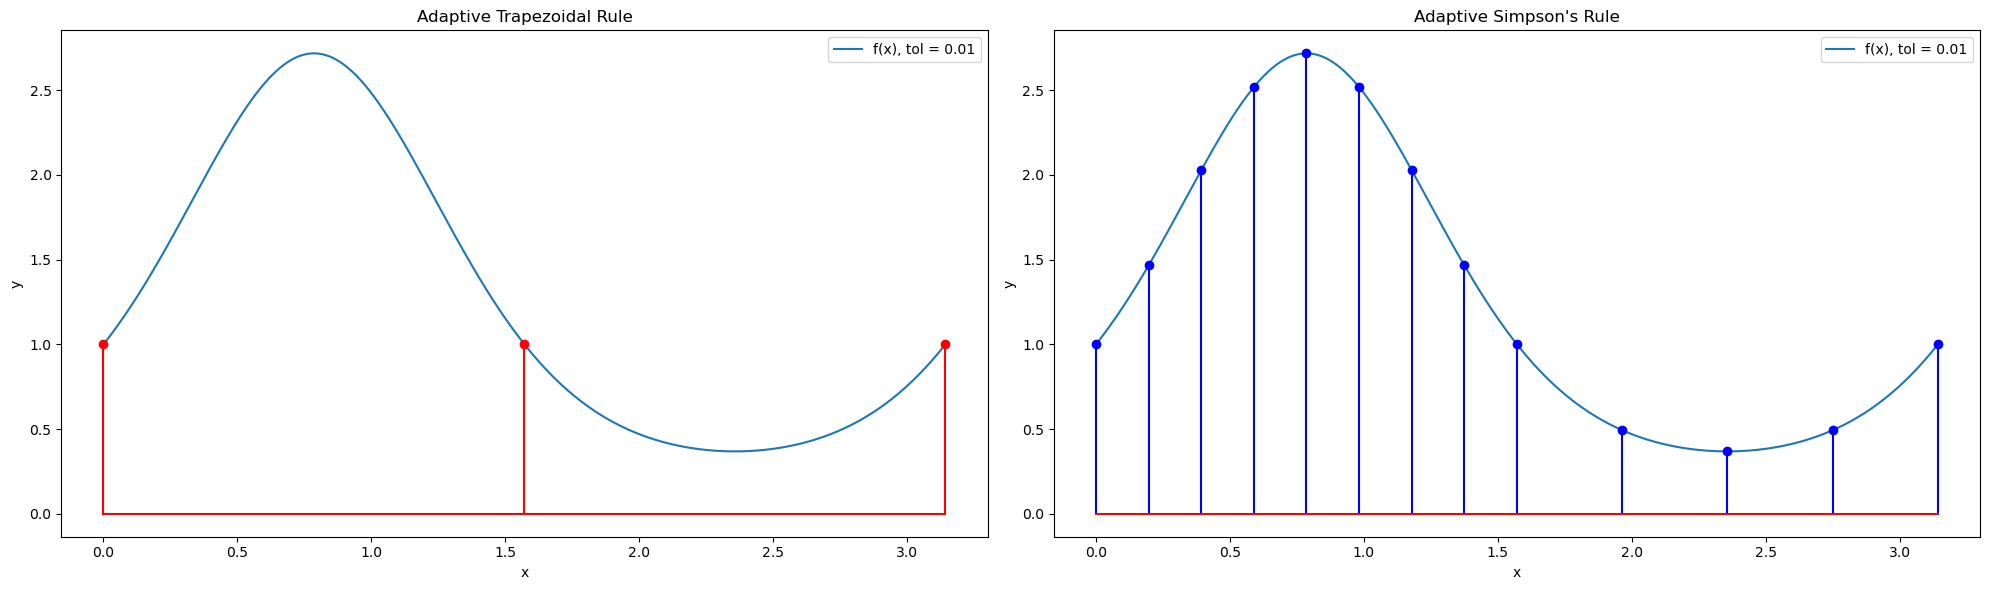

 Function 3, Tolerance: 0.001
 Error (Trapezoidal): 13.42477796076938, Function evaluations (Trapezoidal): 3
 Error (Simpson):     12.588525444019076,Function evaluations (Simpson): 17 


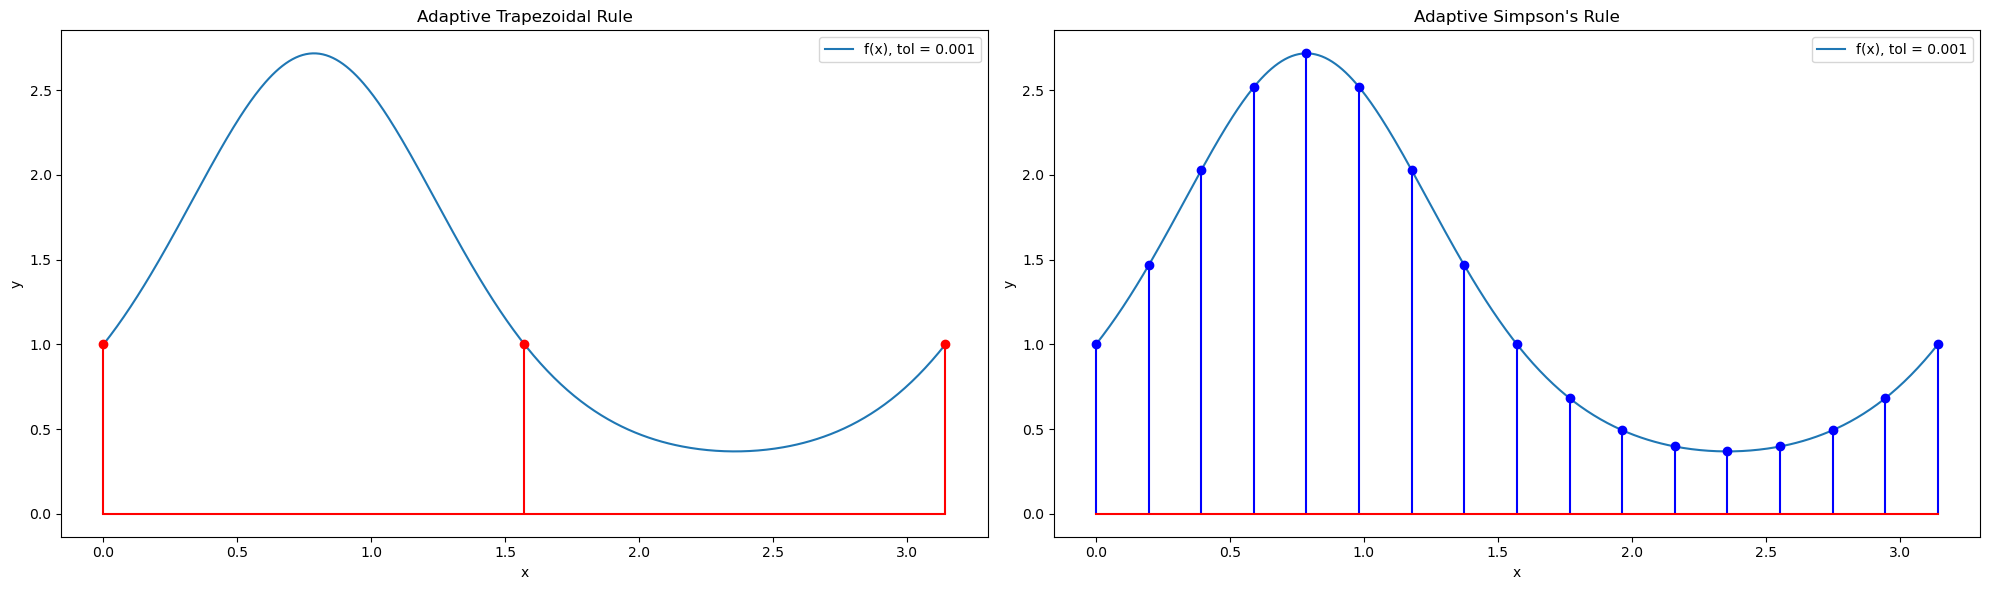

 Function 3, Tolerance: 0.0001
 Error (Trapezoidal): 13.42477796076938, Function evaluations (Trapezoidal): 3
 Error (Simpson):     12.588974490438211,Function evaluations (Simpson): 25 


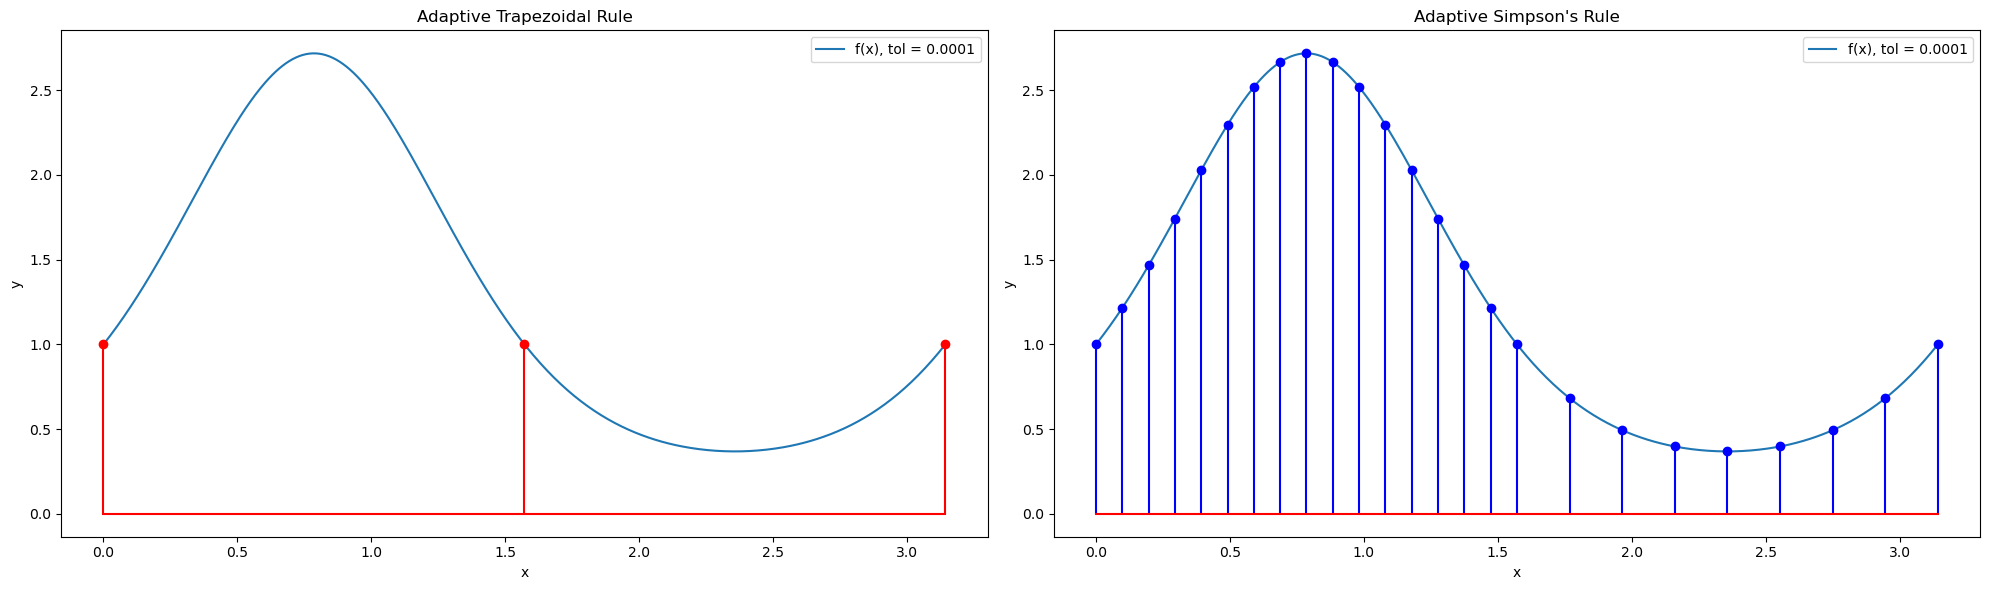

In [9]:
def f1(x):
    return 2 + np.sin(x**2)

def f2(x):
    return 4 + 2 * np.sin(x) + np.cos(3 * x)

def f3(x):
    return np.exp(np.sin(2 * x))

#intervals for the functions
intervals = [
    (f1, 0, 5),
    (f2, 0, 2 * np.pi),
    (f3, 0, np.pi)
]

# Exact values for the integrals of the functions
exact_values = [10.527917281165323, 25.132741228718345, 16.566370614359172]


tolerances = [1.e-1, 1.e-2, 1.e-3, 1.e-4]

def run_tests():
    for idx, (f, a, b) in enumerate(intervals):
        exact_value = exact_values[idx] 
        for tol in tolerances:
            integral_trap, eval_count_trap, nodes_trap = TrapezAdaptivVorlage(f, a, b, tol)
            integral_simp, eval_count_simp, nodes_simp = AdaptiveSimpsonsRule(f, a, b, tol)
            
            # Sort the nodes and convert them to an ndarray
            nodes_trap = np.array(sorted(nodes_trap))
            nodes_simp = np.array(sorted(nodes_simp))
            
            # Calculate the number of function evaluations
            eval_count_trap = len(nodes_trap)
            eval_count_simp = len(nodes_simp)
            
            # Calculate errors
            error_trap = np.abs(exact_value - integral_trap)
            error_simp = np.abs(exact_value - integral_simp)    
            
            
            print(f" Function {idx + 1}, Tolerance: {tol}\n Error (Trapezoidal): {error_trap}, Function evaluations (Trapezoidal): {eval_count_trap}\n Error (Simpson):     {error_simp},Function evaluations (Simpson): {eval_count_simp} ")

            
            
            x = np.linspace(a, b, 500)
            y = f(x)
            
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
            

            x_points_trap, y_points_trap = zip(*nodes_trap)
            ax1.plot(x, y, label=f"f(x), tol = {tol}")
            ax1.stem(x_points_trap, y_points_trap, linefmt='r-', markerfmt='ro', basefmt='r-')
            ax1.legend()
            ax1.set_title("Adaptive Trapezoidal Rule")
            ax1.set_xlabel("x")
            ax1.set_ylabel("y")
            

            x_points_simp, y_points_simp = zip(*nodes_simp)
            ax2.plot(x, y, label=f"f(x), tol = {tol}")
            ax2.stem(x_points_simp, y_points_simp, linefmt='b-', markerfmt='bo', basefmt='r-')
            ax2.legend()
            ax2.set_title("Adaptive Simpson's Rule")
            ax2.set_xlabel("x")
            ax2.set_ylabel("y")

            plt.tight_layout()
            plt.show()

            
if __name__ == "__main__":
    run_tests()


# 5- Composite-Trapezoidal Rule Compared to Adaptive Methods

Function 1, Tolerance: 0.1

Adaptive Trapezoidal: Error = 0.7488077947386564, Evaluations = 3
Summed Trapezoidal:   Error = 0.776305010156431, Evaluations = 3
Adaptive Simpson's:   Error = 0.07080256210874758, Evaluations = 9



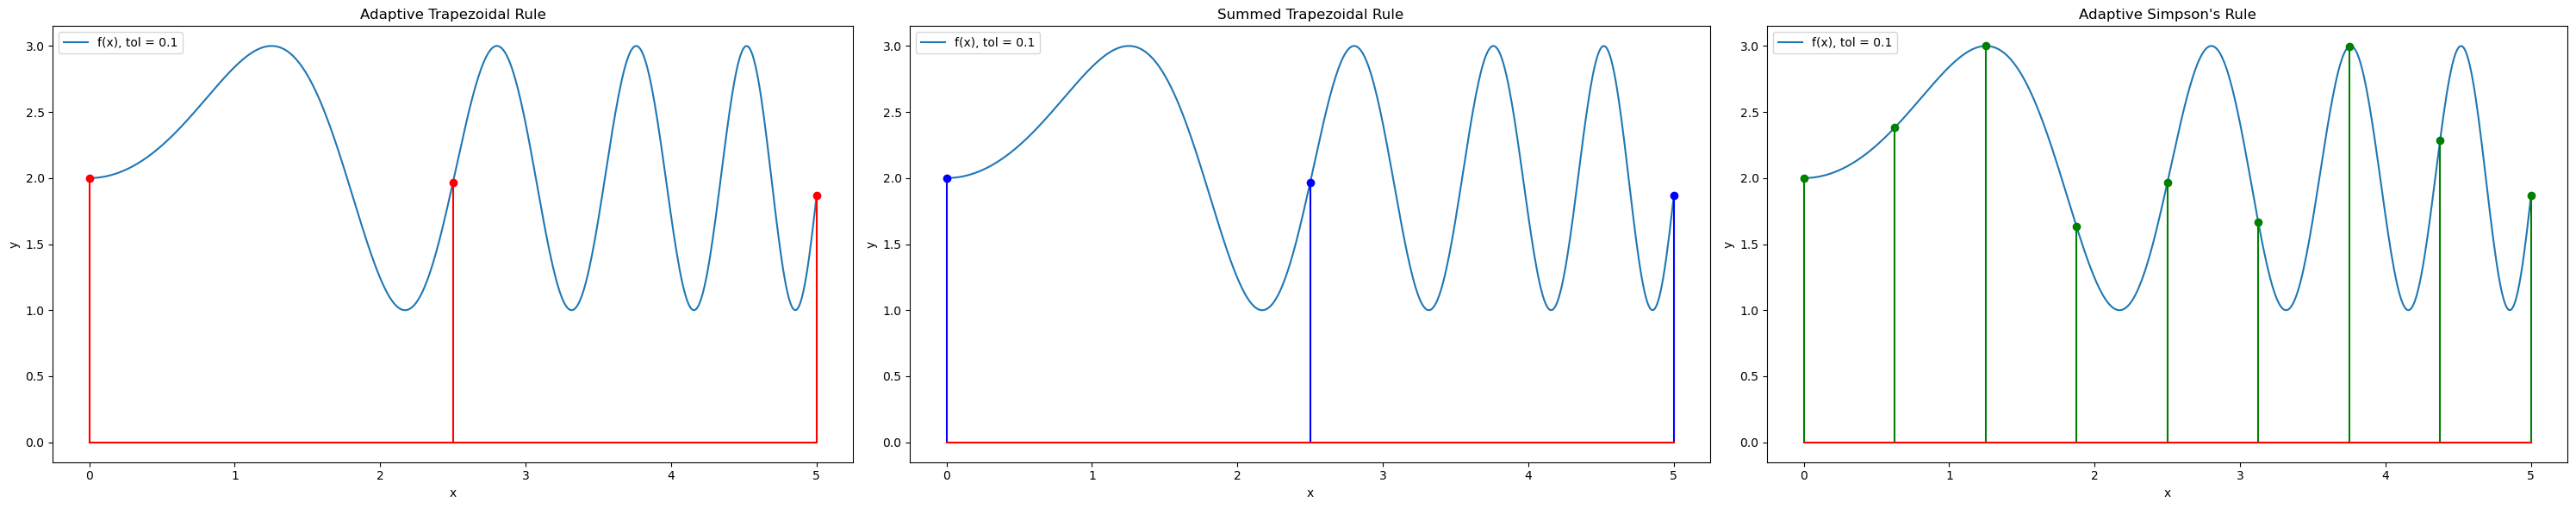

Function 1, Tolerance: 0.01

Adaptive Trapezoidal: Error = 0.01177823206280948, Evaluations = 39
Summed Trapezoidal:   Error = 0.0012635704877510534, Evaluations = 129
Adaptive Simpson's:   Error = 0.007349388740355067, Evaluations = 25



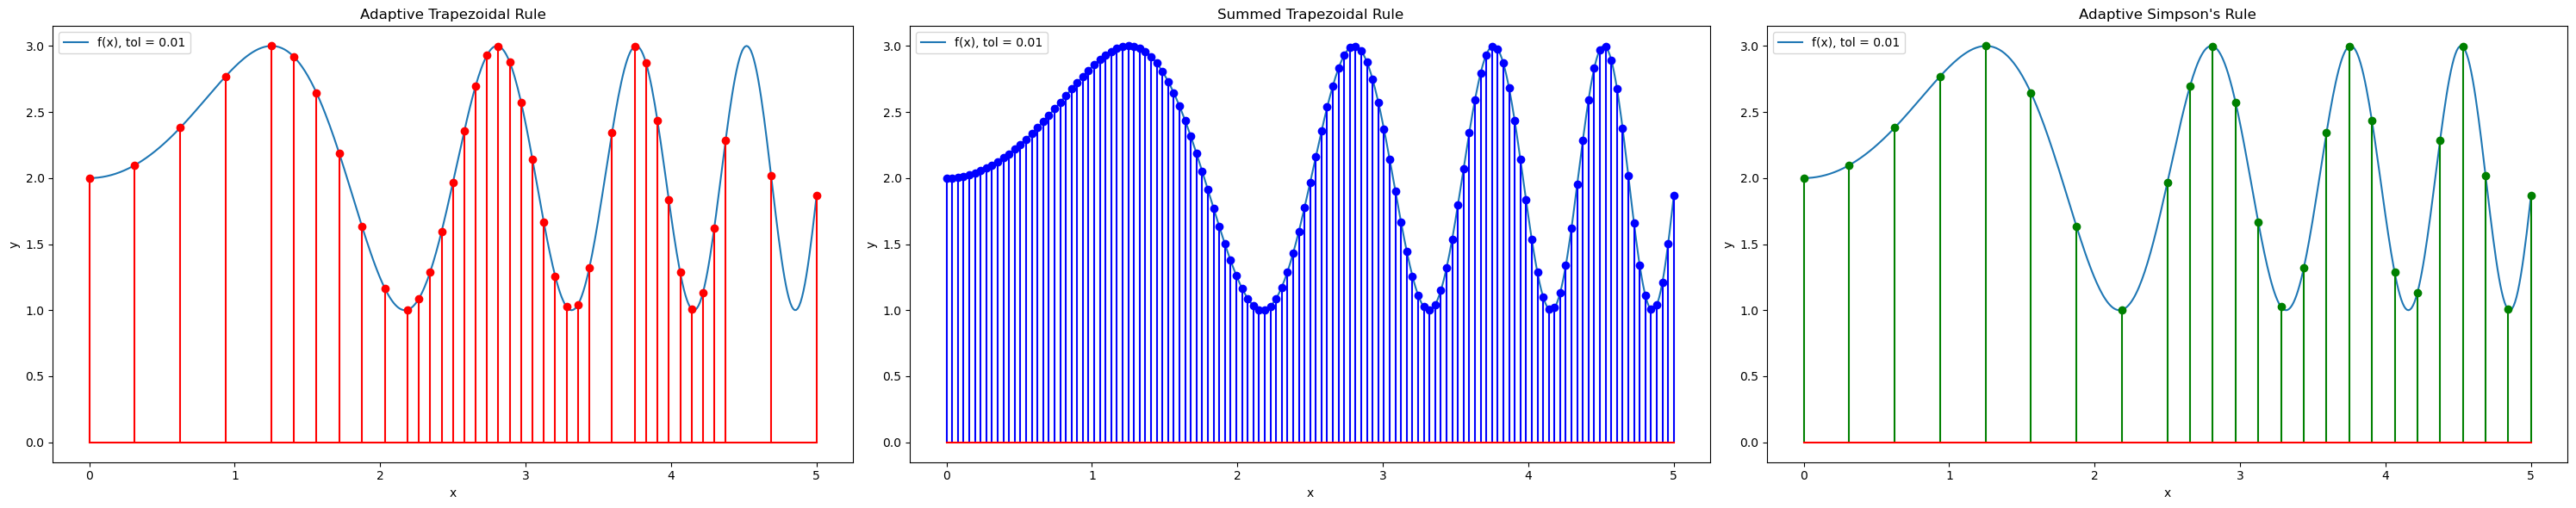

Function 1, Tolerance: 0.001

Adaptive Trapezoidal: Error = 5.4920759312793166e-05, Evaluations = 91
Summed Trapezoidal:   Error = 0.00031529379112704703, Evaluations = 257
Adaptive Simpson's:   Error = 0.0024872495287091567, Evaluations = 45



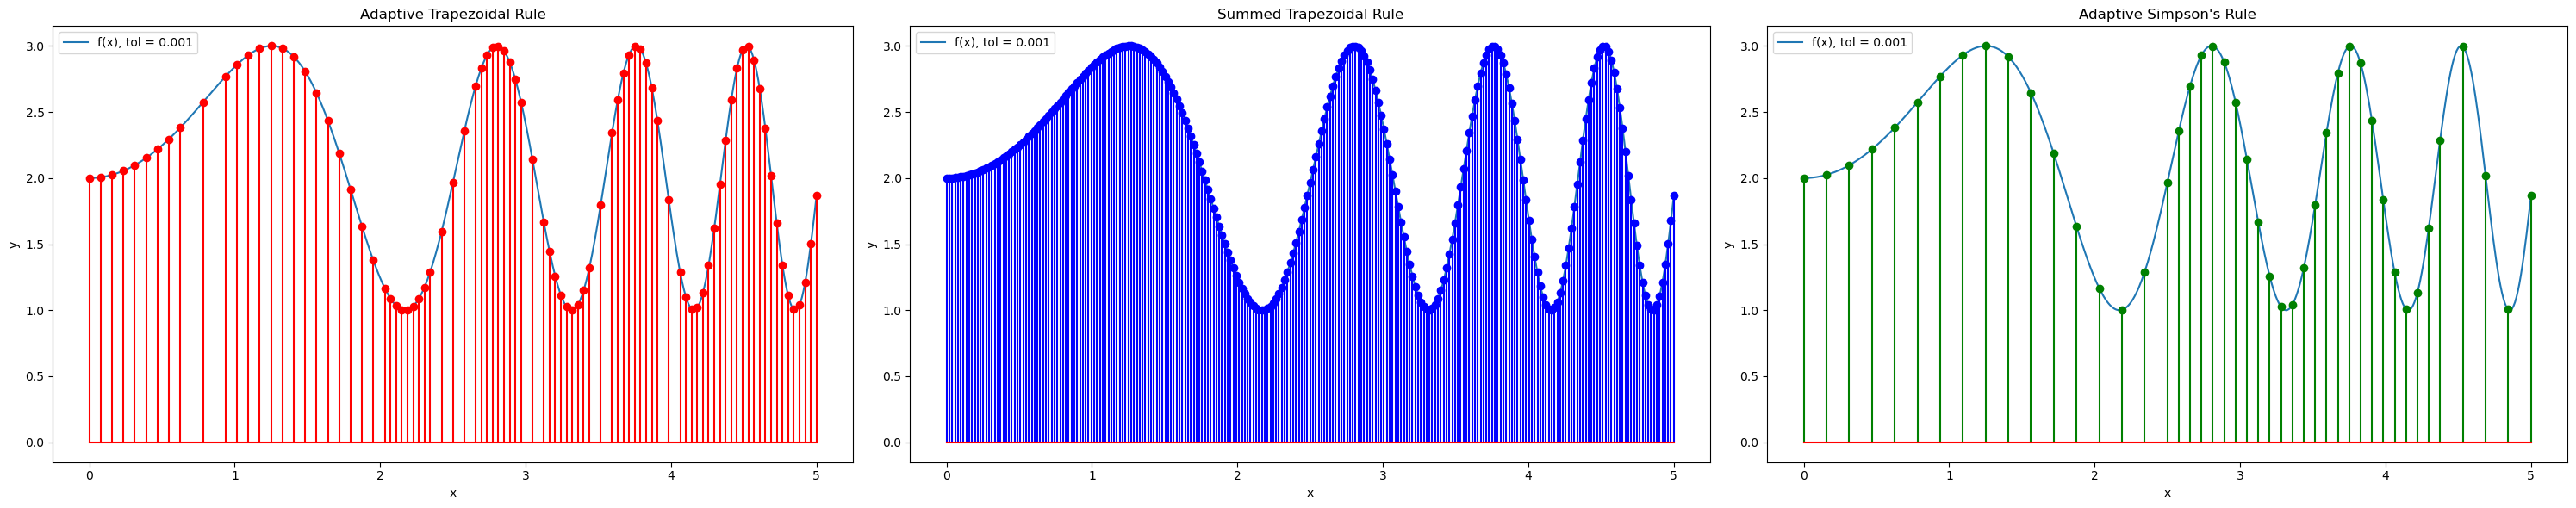

Function 1, Tolerance: 0.0001

Adaptive Trapezoidal: Error = 1.3524237374440418e-06, Evaluations = 199
Summed Trapezoidal:   Error = 1.96942068200201e-05, Evaluations = 1025
Adaptive Simpson's:   Error = 8.886068467717223e-06, Evaluations = 77



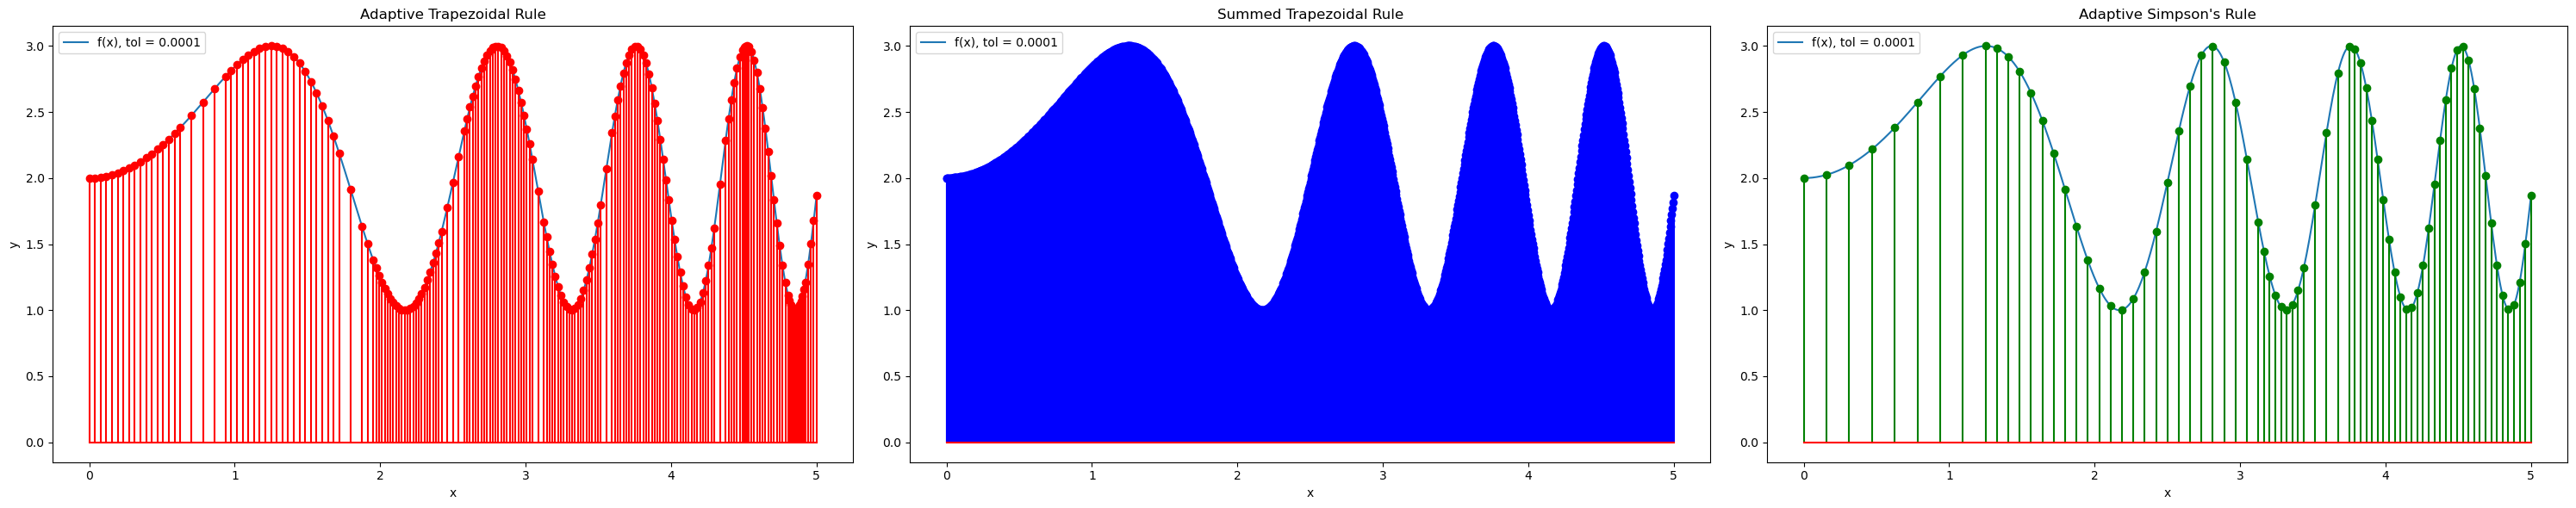

Function 2, Tolerance: 0.1

Adaptive Trapezoidal: Error = 0.0, Evaluations = 17
Summed Trapezoidal:   Error = 0.0, Evaluations = 5
Adaptive Simpson's:   Error = 7.105427357601002e-15, Evaluations = 9



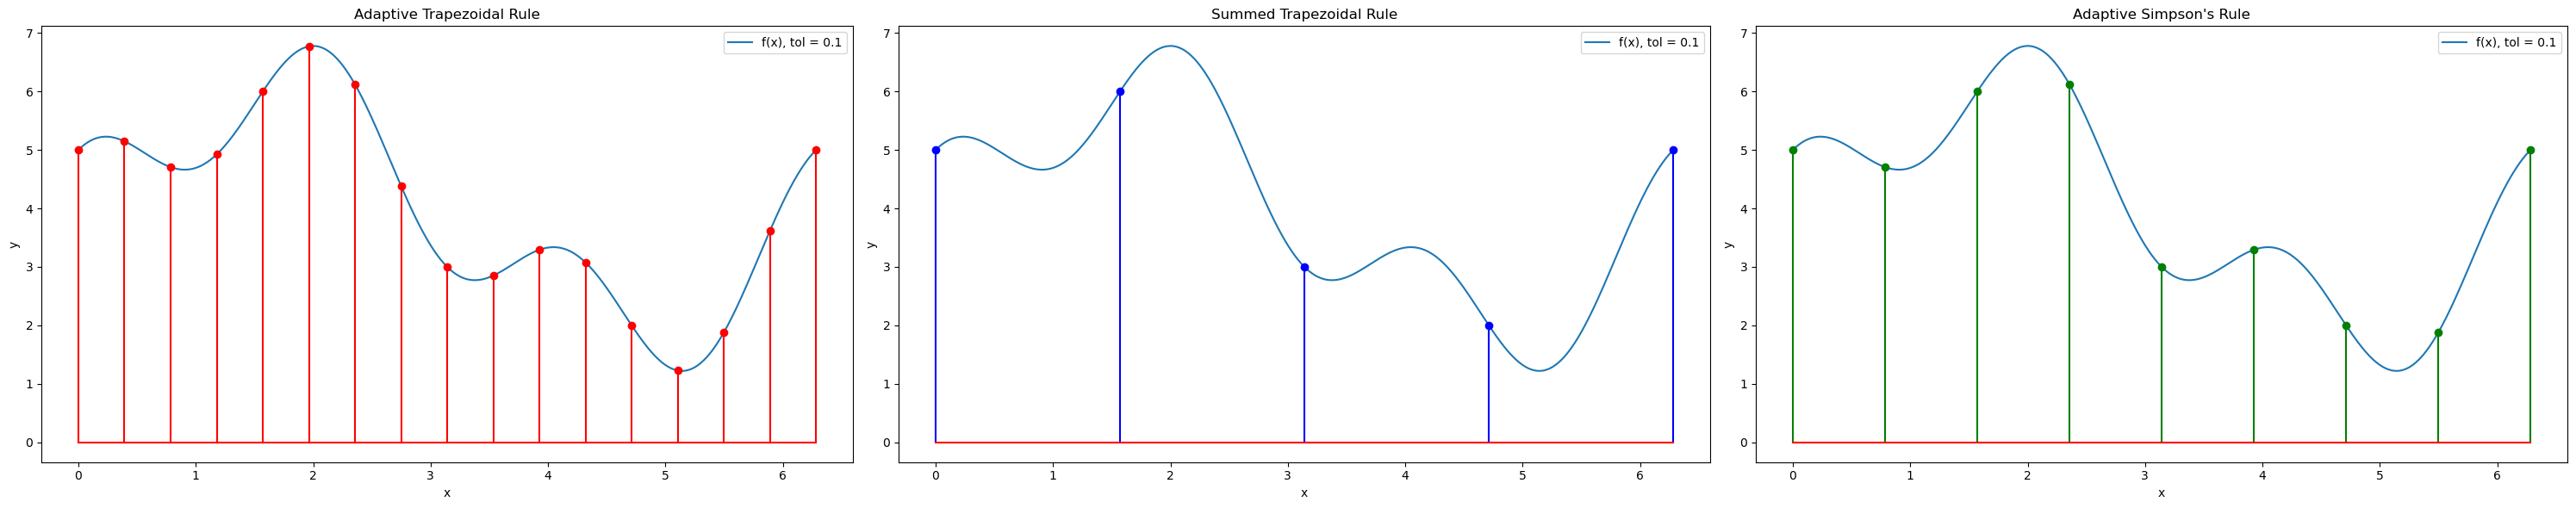

Function 2, Tolerance: 0.01

Adaptive Trapezoidal: Error = 0.0, Evaluations = 37
Summed Trapezoidal:   Error = 0.0, Evaluations = 5
Adaptive Simpson's:   Error = 3.552713678800501e-15, Evaluations = 17



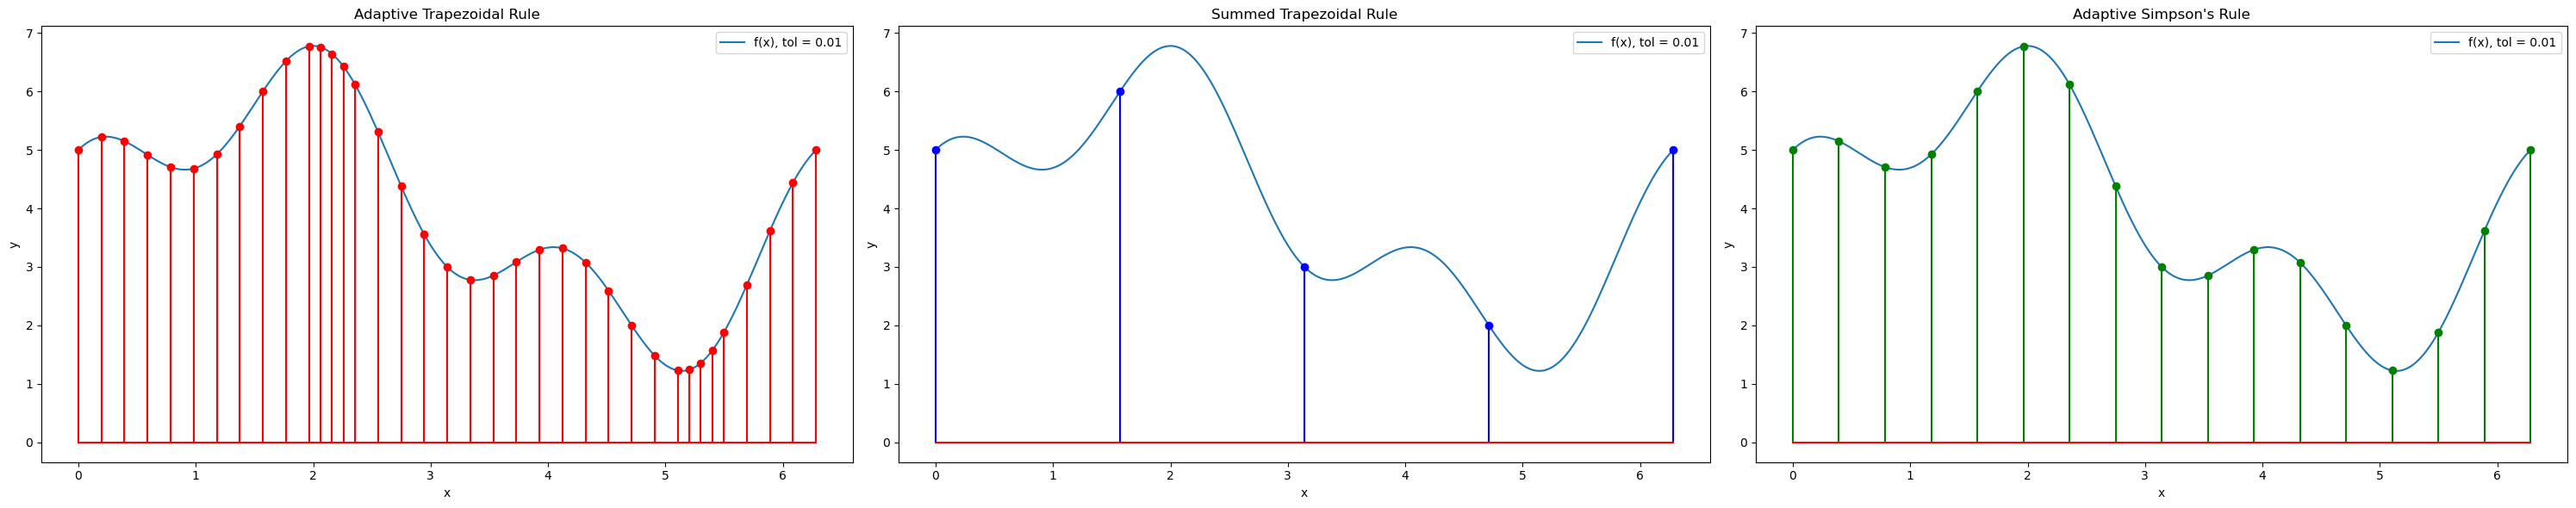

Function 2, Tolerance: 0.001

Adaptive Trapezoidal: Error = 0.0, Evaluations = 85
Summed Trapezoidal:   Error = 0.0, Evaluations = 5
Adaptive Simpson's:   Error = 3.552713678800501e-15, Evaluations = 33



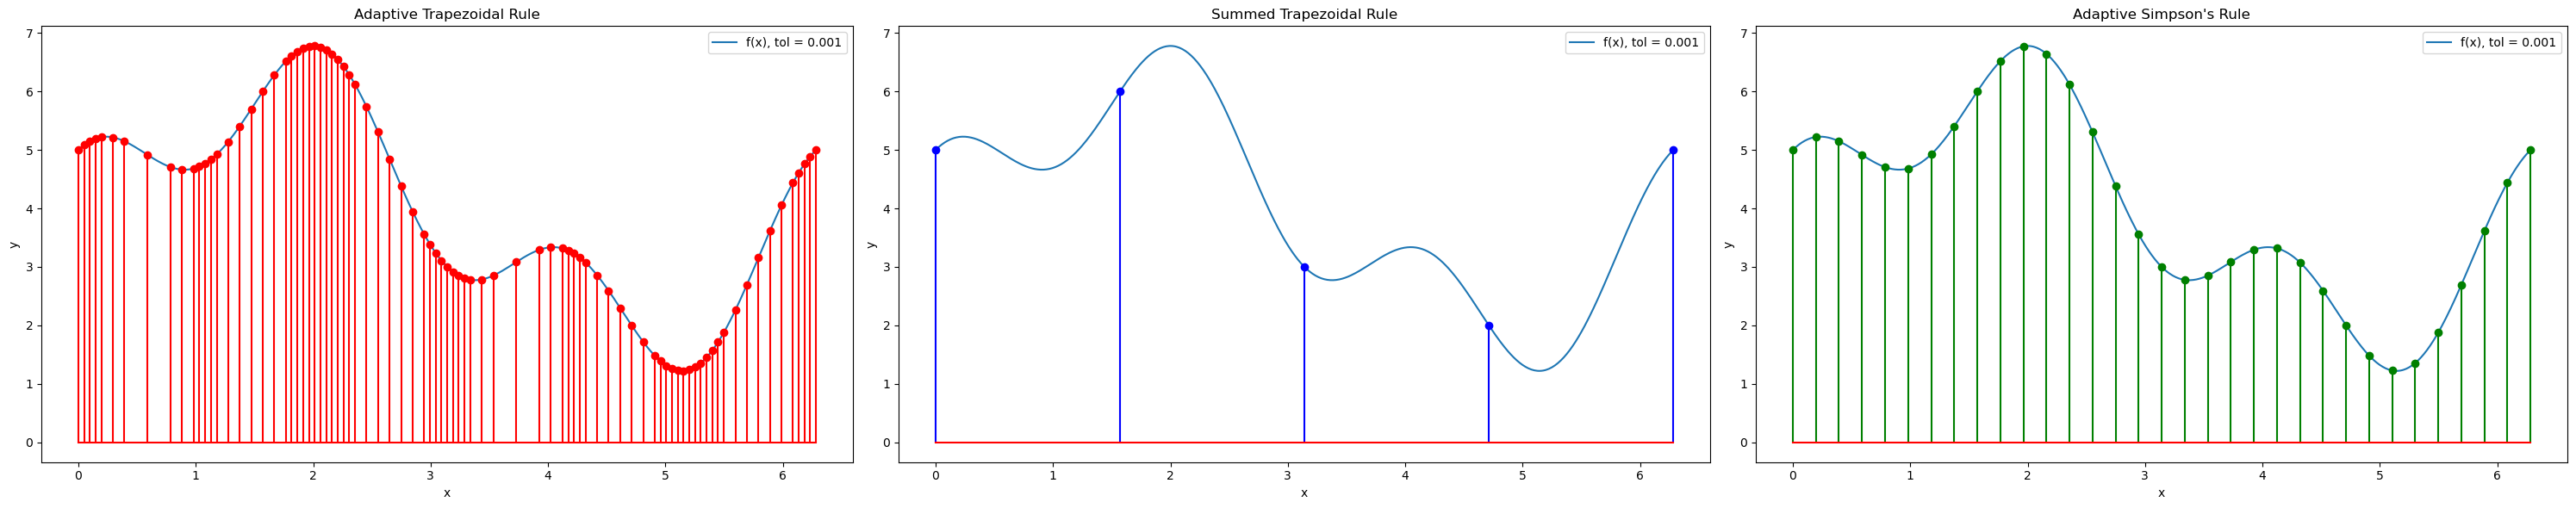

Function 2, Tolerance: 0.0001

Adaptive Trapezoidal: Error = 0.0, Evaluations = 201
Summed Trapezoidal:   Error = 0.0, Evaluations = 5
Adaptive Simpson's:   Error = 0.0, Evaluations = 65



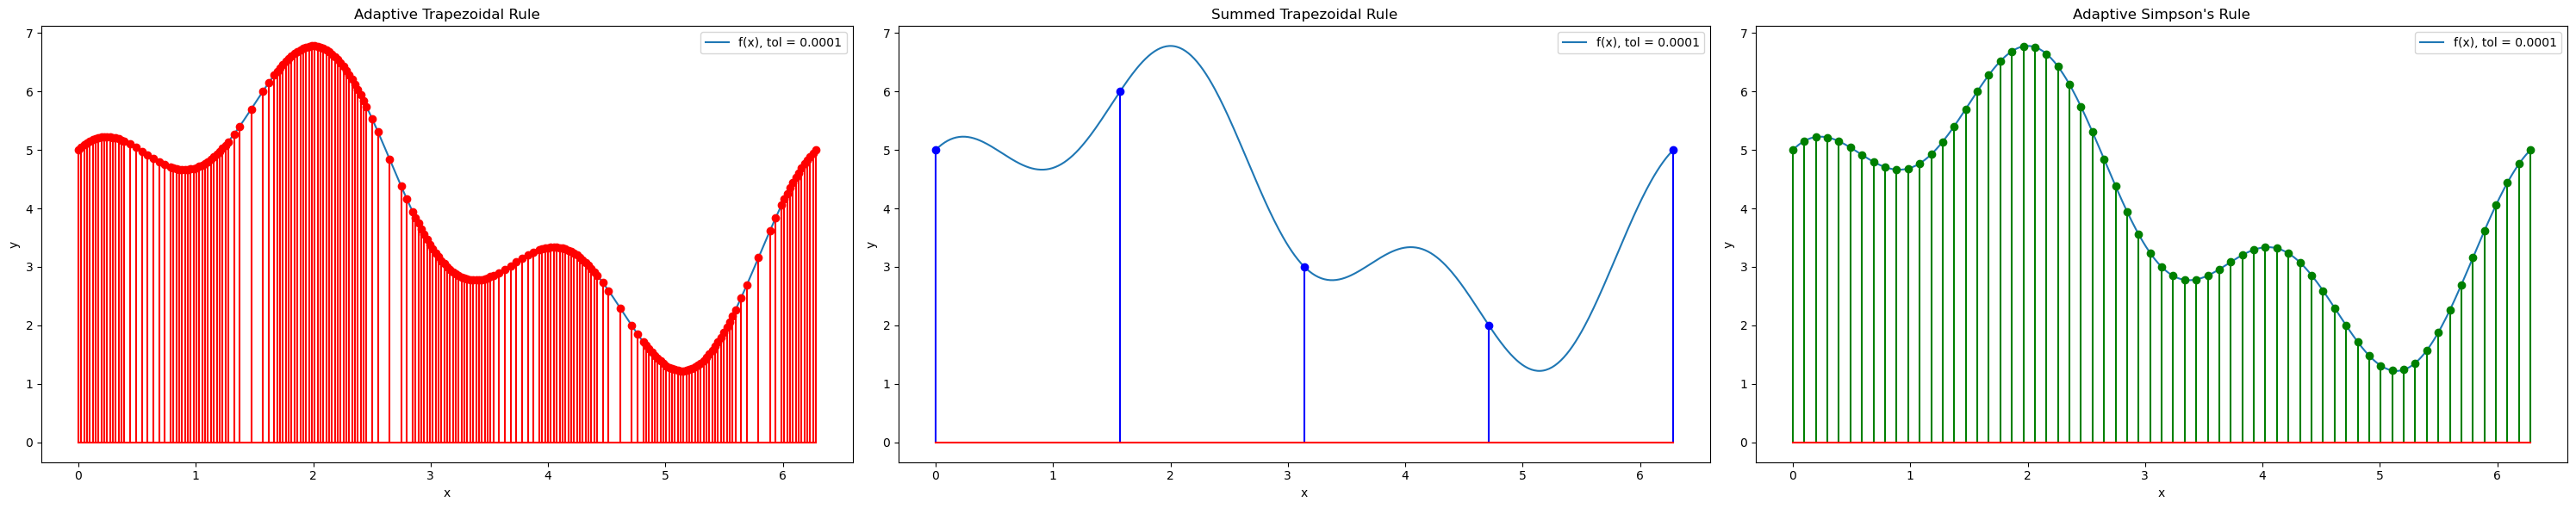

Function 3, Tolerance: 0.1

Adaptive Trapezoidal: Error = 13.42477796076938, Evaluations = 3
Summed Trapezoidal:   Error = 13.42477796076938, Evaluations = 3
Adaptive Simpson's:   Error = 12.21152417755697, Evaluations = 5



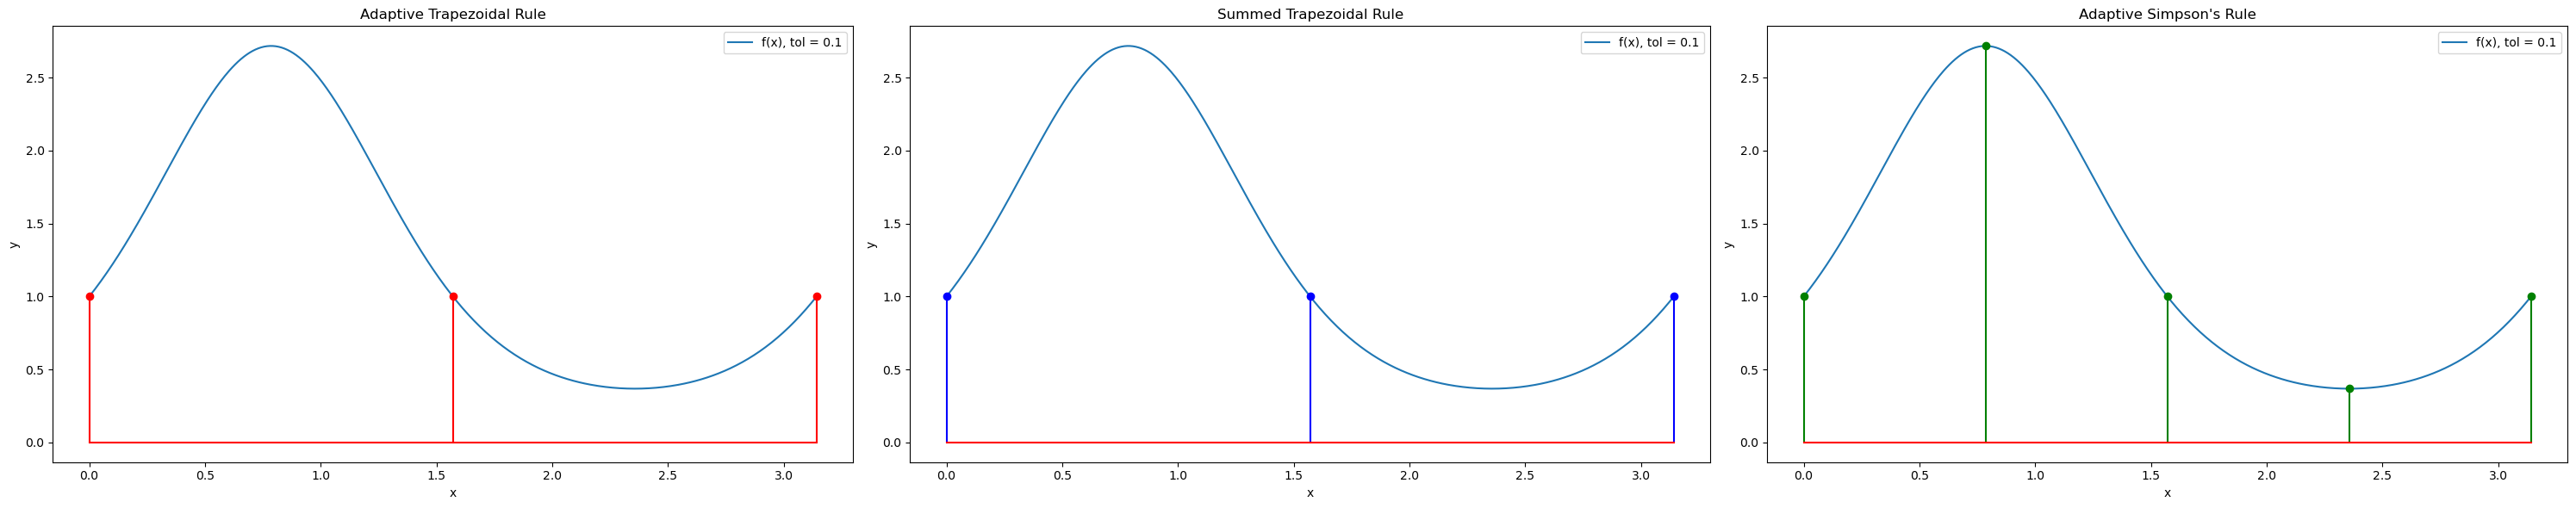

Function 3, Tolerance: 0.01

Adaptive Trapezoidal: Error = 13.42477796076938, Evaluations = 3
Summed Trapezoidal:   Error = 13.42477796076938, Evaluations = 3
Adaptive Simpson's:   Error = 12.58938384206893, Evaluations = 13



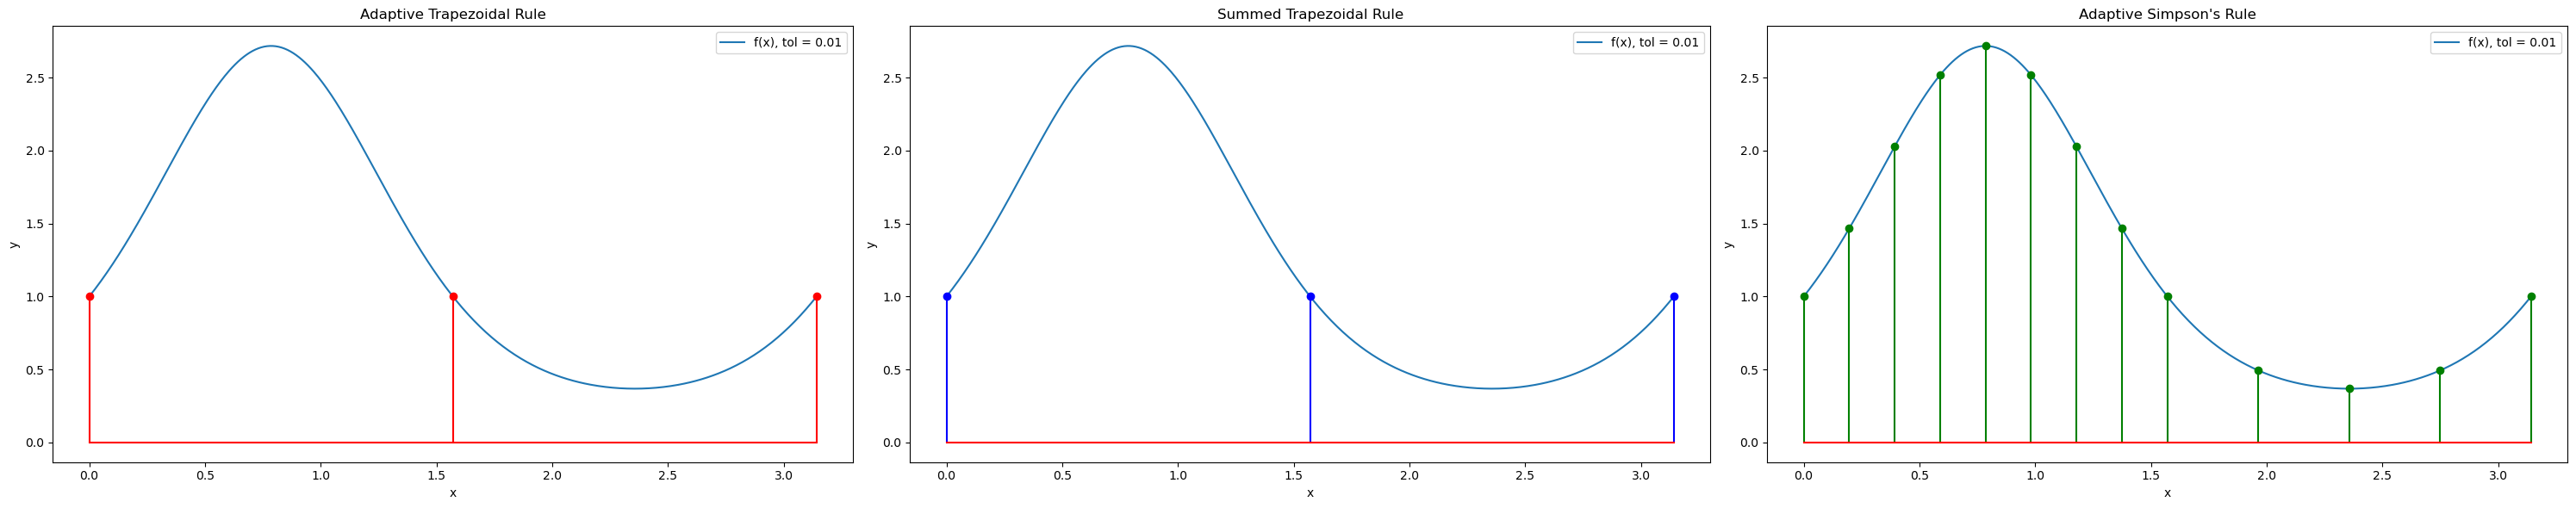

Function 3, Tolerance: 0.001

Adaptive Trapezoidal: Error = 13.42477796076938, Evaluations = 3
Summed Trapezoidal:   Error = 13.42477796076938, Evaluations = 3
Adaptive Simpson's:   Error = 12.588525444019076, Evaluations = 17



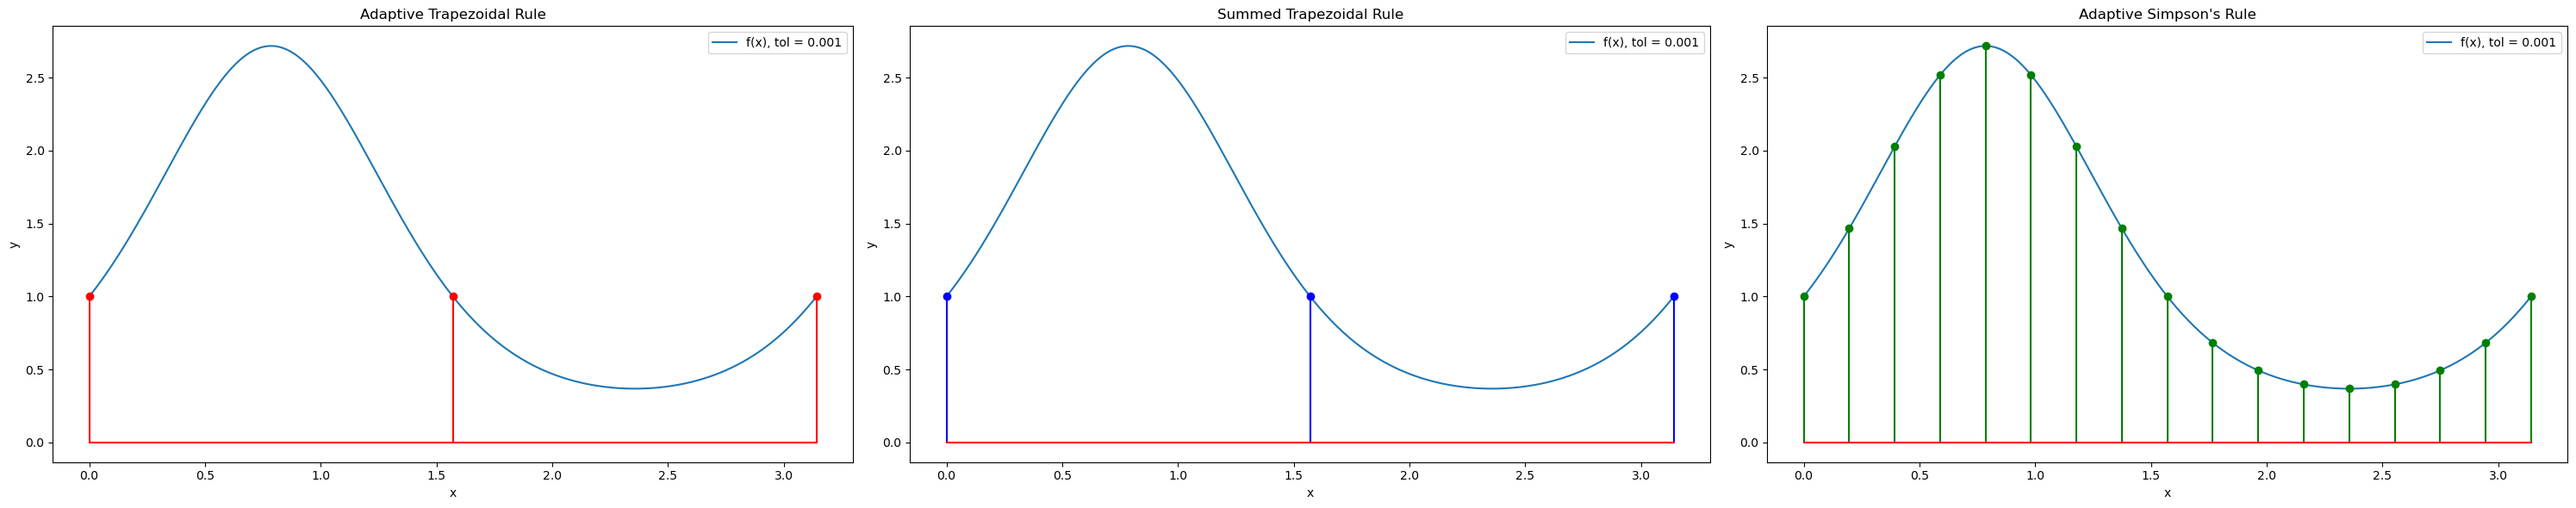

Function 3, Tolerance: 0.0001

Adaptive Trapezoidal: Error = 13.42477796076938, Evaluations = 3
Summed Trapezoidal:   Error = 13.42477796076938, Evaluations = 3
Adaptive Simpson's:   Error = 12.588974490438211, Evaluations = 25



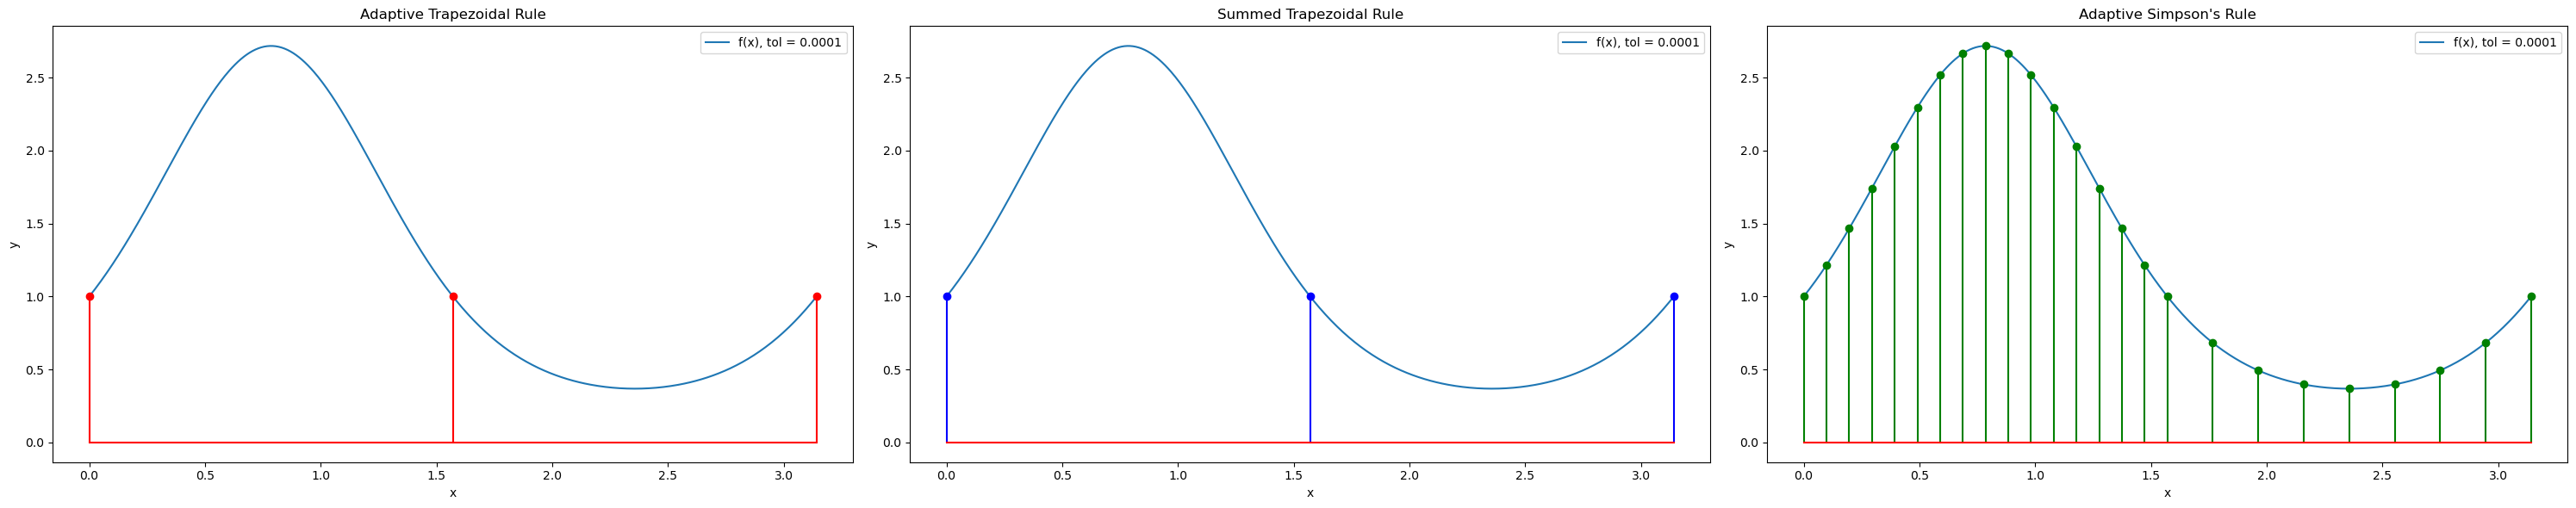

In [10]:
def f1(x):
    return 2 + np.sin(x**2)

def f2(x):
    return 4 + 2 * np.sin(x) + np.cos(3 * x)

def f3(x):
    return np.exp(np.sin(2 * x))

intervals = [
    (f1, 0, 5),
    (f2, 0, 2 * np.pi),
    (f3, 0, np.pi)
]

# Exact values for the integrals of the functions
exact_values = [10.527917281165323, 25.132741228718345, 16.566370614359172]

tolerances = [1.e-1, 1.e-2, 1.e-3, 1.e-4]



def run_verification_tests():
    for idx, (f, a, b) in enumerate(intervals):
        exact_value = exact_values[idx]  
        for tol in tolerances:
            integral_adapt_trap, eval_count_adapt_trap, nodes_adapt_trap = TrapezAdaptivVorlage(f, a, b, tol)
            integral_simp, eval_count_simp, nodes_simp = AdaptiveSimpsonsRule(f, a, b, tol)
            integral_summed_trap, eval_count_summed_trap, nodes_summed_trap = summed_trapezoidal_rule(f, a, b, tol)

            # Sort the nodes and convert them to an ndarray
            nodes_adapt_trap = np.array(sorted(nodes_adapt_trap))
            nodes_simp = np.array(sorted(nodes_simp))
            nodes_summed_trap = np.array(sorted(nodes_summed_trap))

            # Calculate errors
            error_adapt_trap = np.abs(exact_value - integral_adapt_trap)
            error_simp = np.abs(exact_value - integral_simp)
            error_summed_trap = np.abs(exact_value - integral_summed_trap)

            print(f"Function {idx + 1}, Tolerance: {tol}\n")
            print(f"Adaptive Trapezoidal: Error = {error_adapt_trap}, Evaluations = {eval_count_adapt_trap}")
            print(f"Summed Trapezoidal:   Error = {error_summed_trap}, Evaluations = {eval_count_summed_trap}")
            print(f"Adaptive Simpson's:   Error = {error_simp}, Evaluations = {eval_count_simp}\n")


            x = np.linspace(a, b, 500)
            y = f(x)

            fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 6))


            x_points_adapt_trap, y_points_adapt_trap = zip(*nodes_adapt_trap)
            ax1.plot(x, y, label=f"f(x), tol = {tol}")
            ax1.stem(x_points_adapt_trap, y_points_adapt_trap, linefmt='r-', markerfmt='ro', basefmt='r-')
            ax1.legend()
            ax1.set_title("Adaptive Trapezoidal Rule")
            ax1.set_xlabel("x")
            ax1.set_ylabel("y")


            x_points_summed_trap, y_points_summed_trap = zip(*nodes_summed_trap)
            ax2.plot(x, y, label=f"f(x), tol = {tol}")
            ax2.stem(x_points_summed_trap, y_points_summed_trap, linefmt='b-', markerfmt='bo', basefmt='r-')
            ax2.legend()
            ax2.set_title("Summed Trapezoidal Rule")
            ax2.set_xlabel("x")
            ax2.set_ylabel("y")


            x_points_simp, y_points_simp = zip(*nodes_simp)
            ax3.plot(x, y, label=f"f(x), tol = {tol}")
            ax3.stem(x_points_simp, y_points_simp, linefmt='g-', markerfmt='go', basefmt='r-')
            ax3.legend()
            ax3.set_title("Adaptive Simpson's Rule")
            ax3.set_xlabel("x")
            ax3.set_ylabel("y")

            plt.tight_layout()
            plt.show()

if __name__ == "__main__":
    run_verification_tests()
